In [1]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import xbout
import scipy
import xhermes

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.solps_pp import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [41]:
db = CaseDB()

toload = [ 
    # dict(name="oldbase", id="d24bc-E_mfp1_cond0.25", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="oldbase_nocondlim", id="d24b-tunefrec_E_AFN_mfp1.0", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="base", id="d40d-fixfloor_flowoperators", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="base_nocondlim", id="d40de-no_condfluxlim", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="lobase", id="hn2d1d-AFN_base", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="lobase_nocondlim", id="hn2d1e-AFN_nocondlim", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="widelobase", id="hn2d1h-AFN_base_widev2", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="widelobasev3", id="hn2d1j-AFN_base_widev3", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="widelobase_nocondlim", id="hn2d1i-AFN_nocondlim_widev2", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="widelobase_tunealpha", id="hn2d1k-AFN_base_widev3_tunealpha", unnormalise_geom = True, use_xhermes = True, squash = True), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)


- Reading case d40d-fixfloor_flowoperators
-----------------------
- Looking for squash file
- Squash file found. squash date 04/19/2024, 14:46:32, dmp file date 04/17/2024, 17:54:07

Unnormalising with xHermes
- Reading case d40de-no_condfluxlim
-----------------------
- Looking for squash file
- Squash file found. squash date 04/22/2024, 15:43:47, dmp file date 04/22/2024, 11:47:38

Unnormalising with xHermes
- Reading case hn2d1h-AFN_base_widev2
-----------------------
- Looking for squash file
- Squash file found. squash date 04/21/2024, 17:58:55, dmp file date 04/21/2024, 17:24:29


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1134: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case hn2d1k-AFN_base_widev3_tunealpha
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1134: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes


# Read SOLEDGE

In [3]:
soledgecases = {
    "tightwall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_1e19"), # Hermes-3 like wall
    "tightwall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"), # Hermes-3 like wall
    "widewall_2e19_5m" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19_5M"),
    "tightwall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_3e19"), # Hermes-3 like wall
    "widewall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_1e19"), 
    "widewall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19"), 
    "widewall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_3e19"), 
}

sl = dict()

for name in soledgecases:
    path = soledgecases[name]
    sl[name] = SOLEDGEdata(path = path)
    sl[name].read_csv(os.path.join(path, "omp_plasma.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "omp_neutrals.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "imp_plasma.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "imp_neutrals.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")



c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astyp

# Read SOLPS

In [48]:
solpscases = {
    # "base" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5"),
    "noiz_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"),
    # "gammai_2.5" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00"),
    # "dpuff_1e22" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22"),
    # "dpuff_5e21" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=5.0E+21"),
    # "no_fast_reflec" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"),
    # "nsep_2e19" : os.path.join(onedrive_path,r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=2E+19"),
    # "nsep_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=3E+19"),
    # "narrow_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent"),
    # "no_visc" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent.b2tqca_phm0=0"),
    # "16x_mc" : os.path.join(onedrive_path, r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.xxx.BCCON=16.core_extent.MC.histories.x16-ish.NOT.converged"),
    "tightwall_2e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19",
    "tightwall_noD2_1e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=1.0E+19.NO.D2",
    "tightwall_noD2_2e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19.NO.D2",
    "tightwall_noD2_3e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=3.0E+19.NO.D2",
    
}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    # sp[name].read_last10s(solpscases[name])
    sp[name].read_from_case(solpscases[name])

# Read Hermes-3

In [42]:
hr = dict()
for name in cs.keys(): 
    print(name)
    hr[name] = Hermesdata()
    hr[name].read_case(cs[name].ds.isel(t=-1, x = slice(2,-2)))

    
    ds = cs[name].ds
    ds = calculate_radial_fluxes(ds, new_afn = True)
    # ds = calculate_target_fluxes(ds)
    ds = reverse_pfr_fluxes(ds)

base


base_nocondlim
widelobase
widelobase_tunealpha


# Convergence

In [46]:
cs.keys()

dict_keys(['base', 'base_nocondlim', 'widelobase', 'widelobase_tunealpha'])

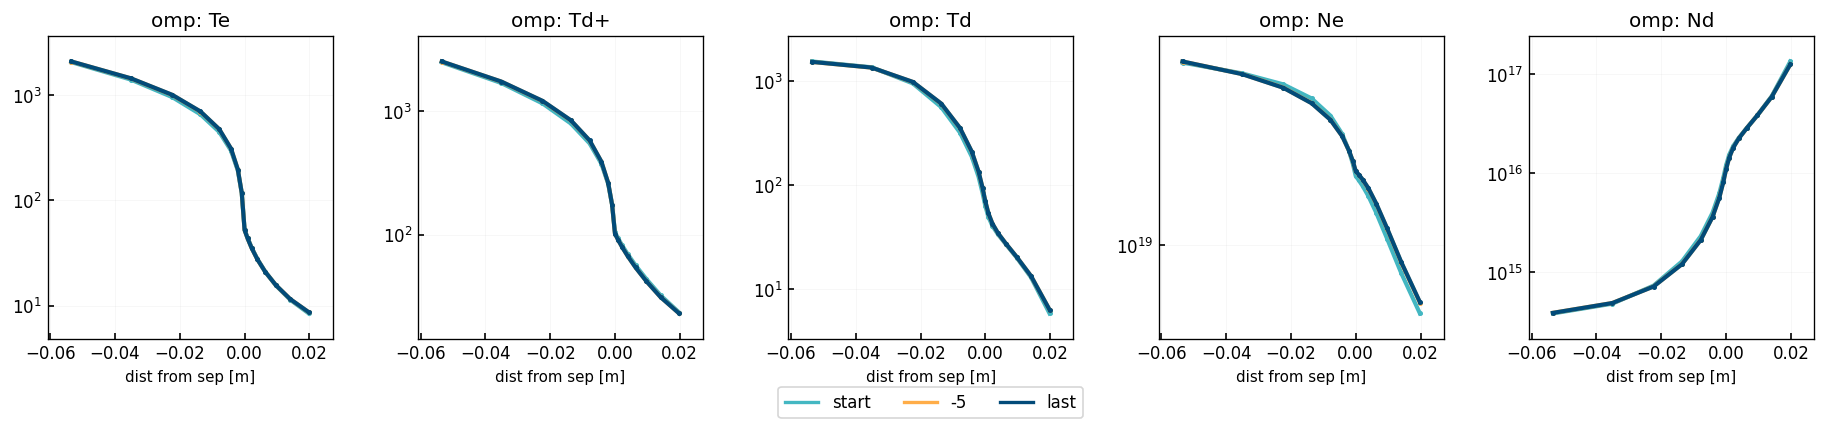

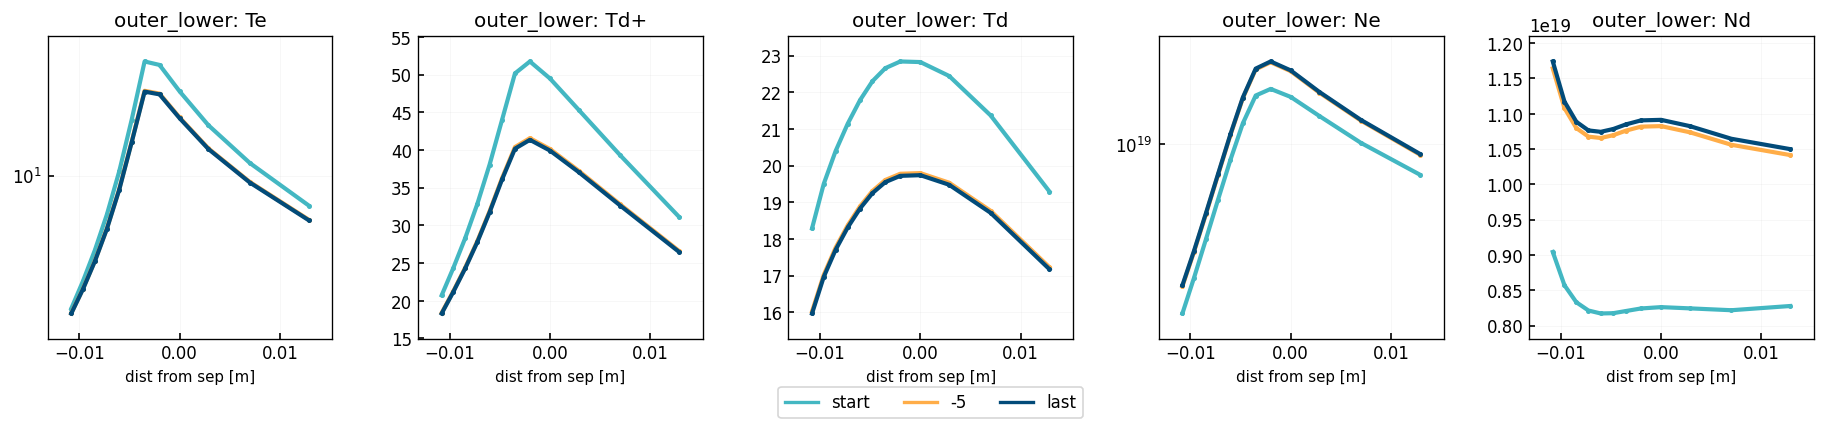

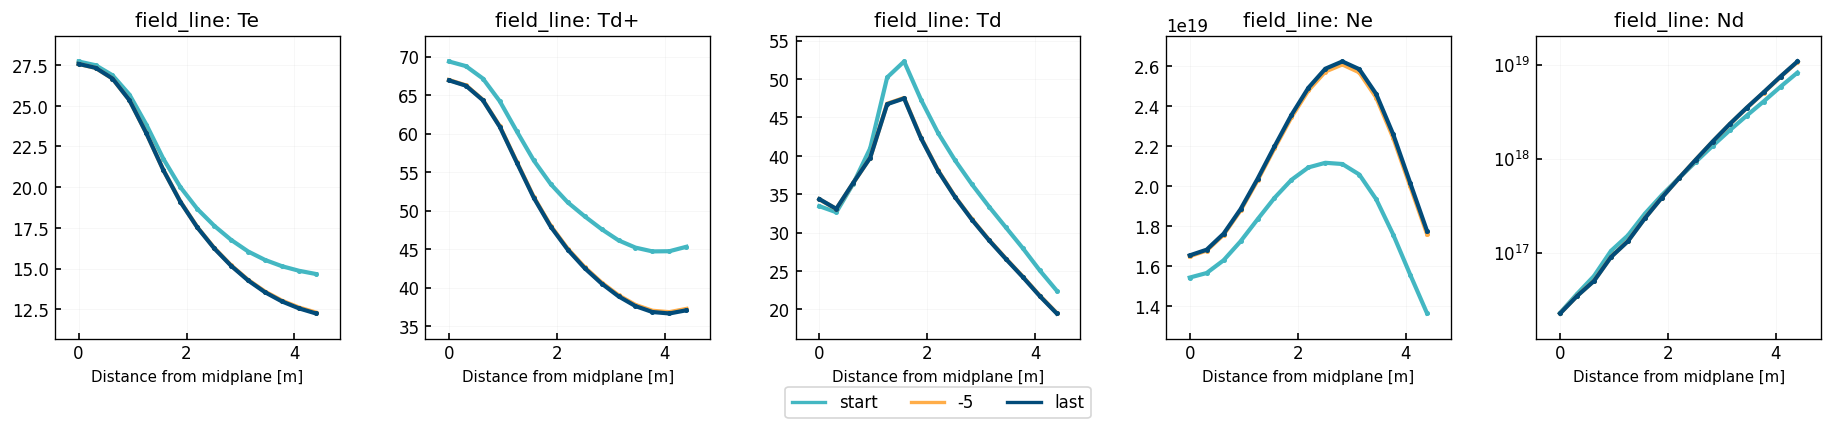

In [47]:
case = "widelobase_tunealpha"
lineplot(
    {
        "start":cs[case].ds.isel(t=0, x = slice(2,-2)),
        "-5":cs[case].ds.isel(t=-3, x = slice(2,-2)),
        "last":cs[case].ds.isel(t=-1, x = slice(2,-2)),
        # "base":cs["base"].ds.isel(t=-1, x = slice(2,-2)),

    },
    clean_guards = False,
    params = ["Te", "Td+", "Td", "Ne", "Nd"],
    regions = ["omp", "outer_lower", "field_line"],
)

# Compare hi resolution baselines

In [16]:
cs.keys()

dict_keys(['oldbase', 'oldbase_nocondlim', 'base', 'base_nocondlim', 'lobase', 'lobase_nocondlim'])

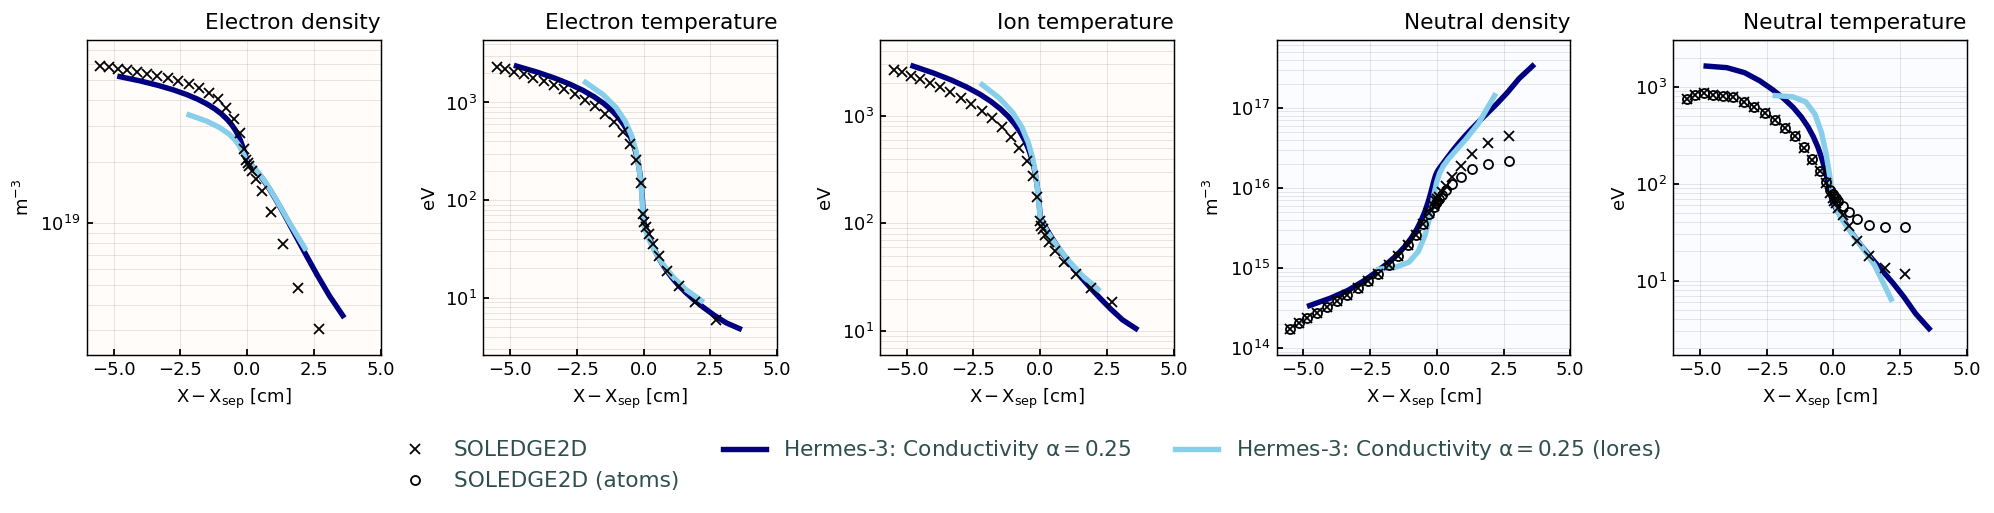

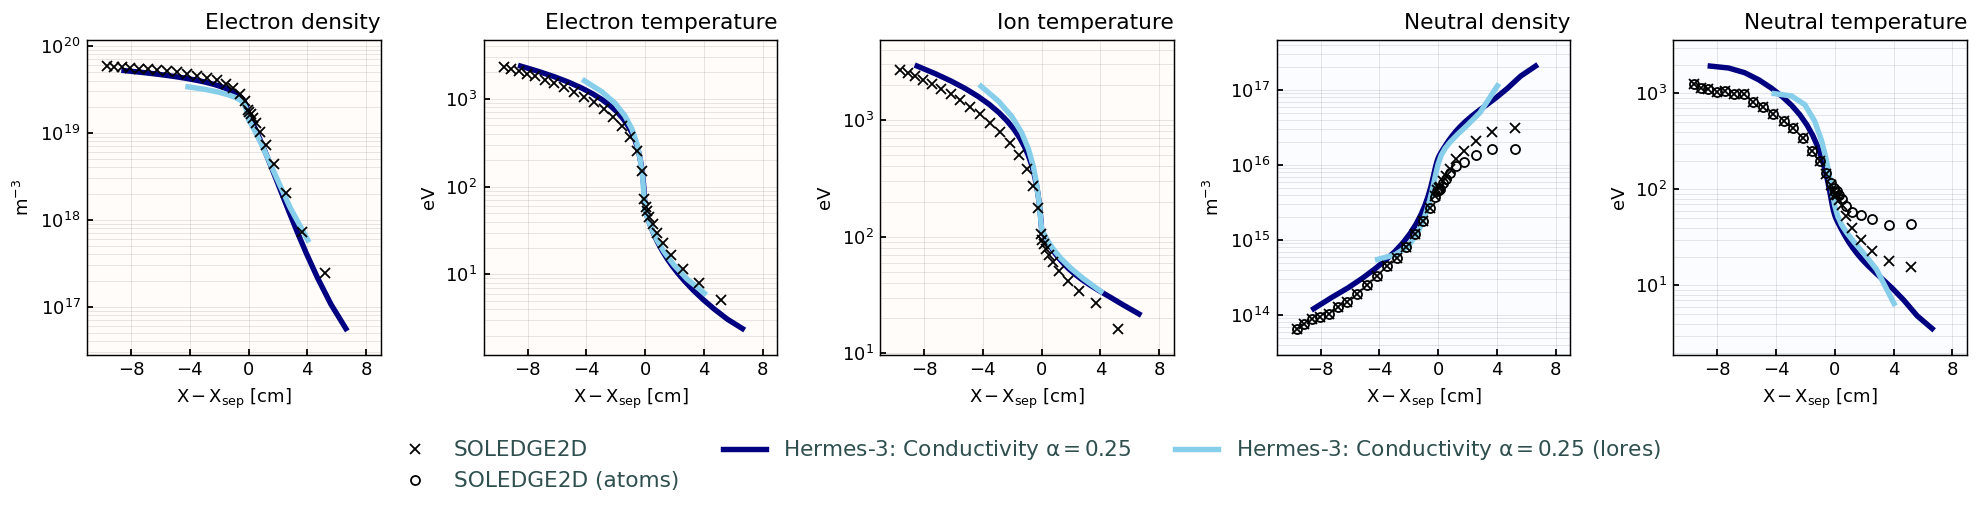

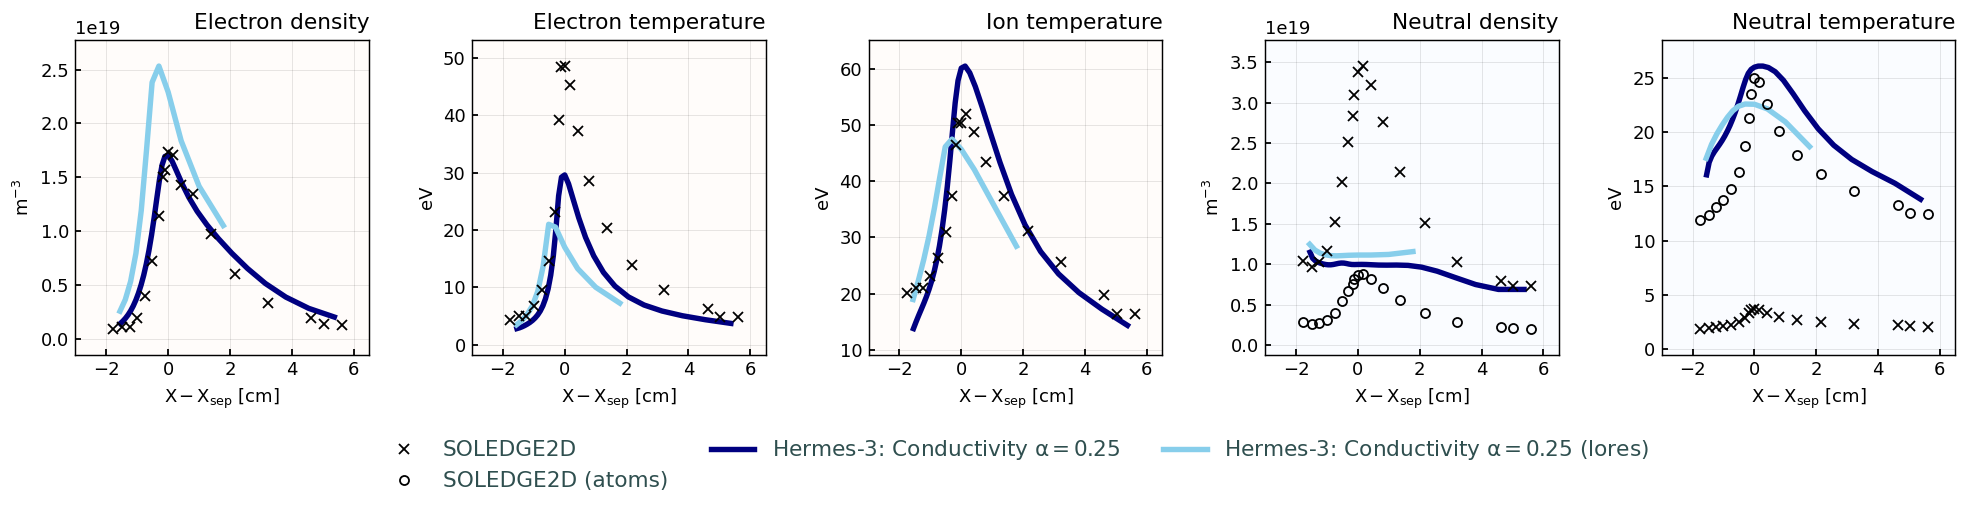

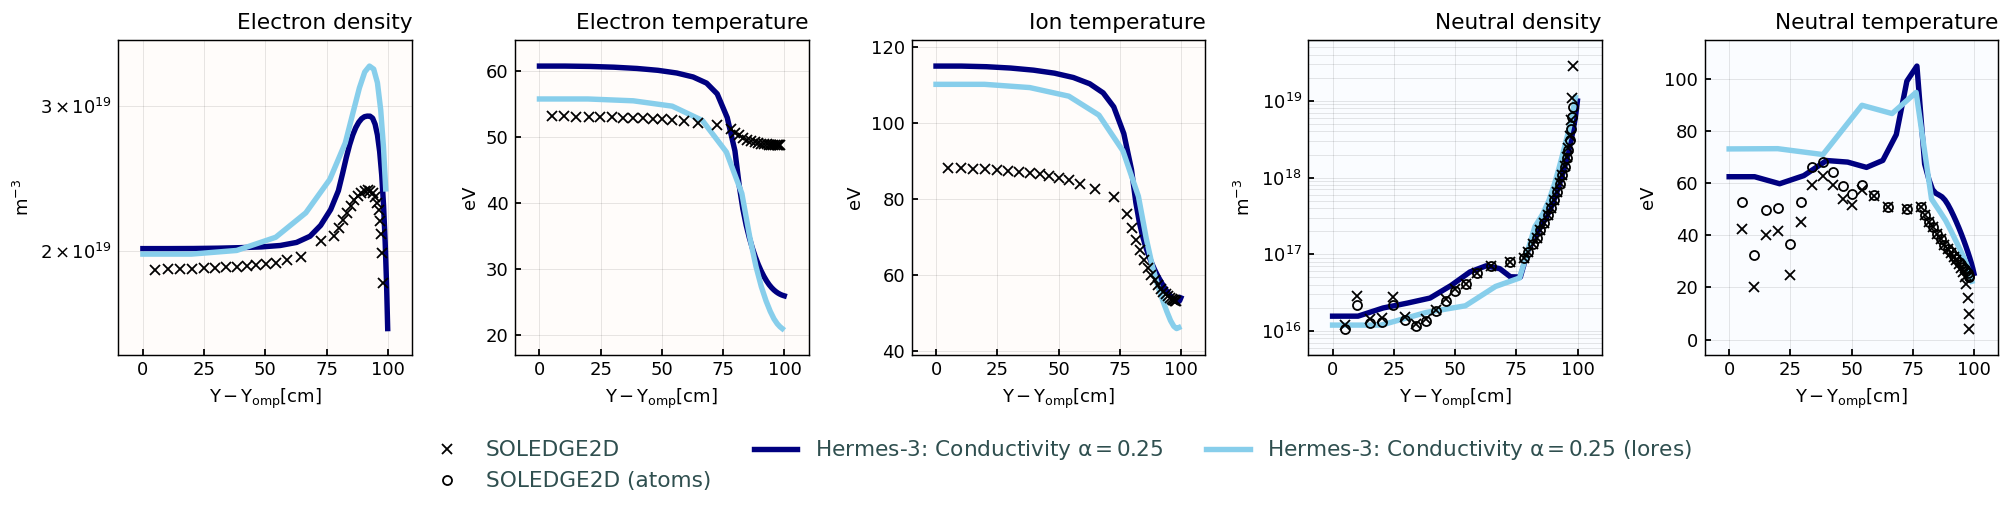

In [43]:
lineplot_compare(
    cases = { 
    "SOLEDGE2D" : dict(data=sl["tightwall_2e19"], color="black"),
    # r"Hermes-3: Conductivity $\alpha = 1.00$" : dict(data=hr['oldbase_nocondlim'], color = "darkorange"),
    # r"Hermes-3: Conductivity $\alpha = 0.25$" : dict(data=hr['oldbase'], color = "navy"),
    
    # r"Hermes-3: Conductivity $\alpha = 1.00$" : dict(data=hr['base_nocondlim'], color = "darkorange"),
    r"Hermes-3: Conductivity $\alpha = 0.25$" : dict(data=hr['base'], color = "navy"),
    
    # r"Hermes-3: Conductivity $\alpha = 1.00$ (lores)" : dict(data=hr['lobase_nocondlim'], color = "gold"),
    r"Hermes-3: Conductivity $\alpha = 0.25$ (lores)" : dict(data=hr['lobase'], color = "skyblue"),


    },
    regions = ["omp", "imp", "outer_lower", "outer_fieldline"],  
    params = ["Ne", "Te", "Td+", "Na", "Ta"],
    # params = ["Ne", "Te", "Td+", "Na", "Ta"],
    mode = "log",
    dpi = 100,
    lw = 2,
    legend_nrows =1,
    combine_molecules = True
)

# Compare low resolution baselines

In [6]:
cs.keys()

dict_keys(['widelobase', 'widelobasev3', 'widelobase_nocondlim'])

## No cond lim

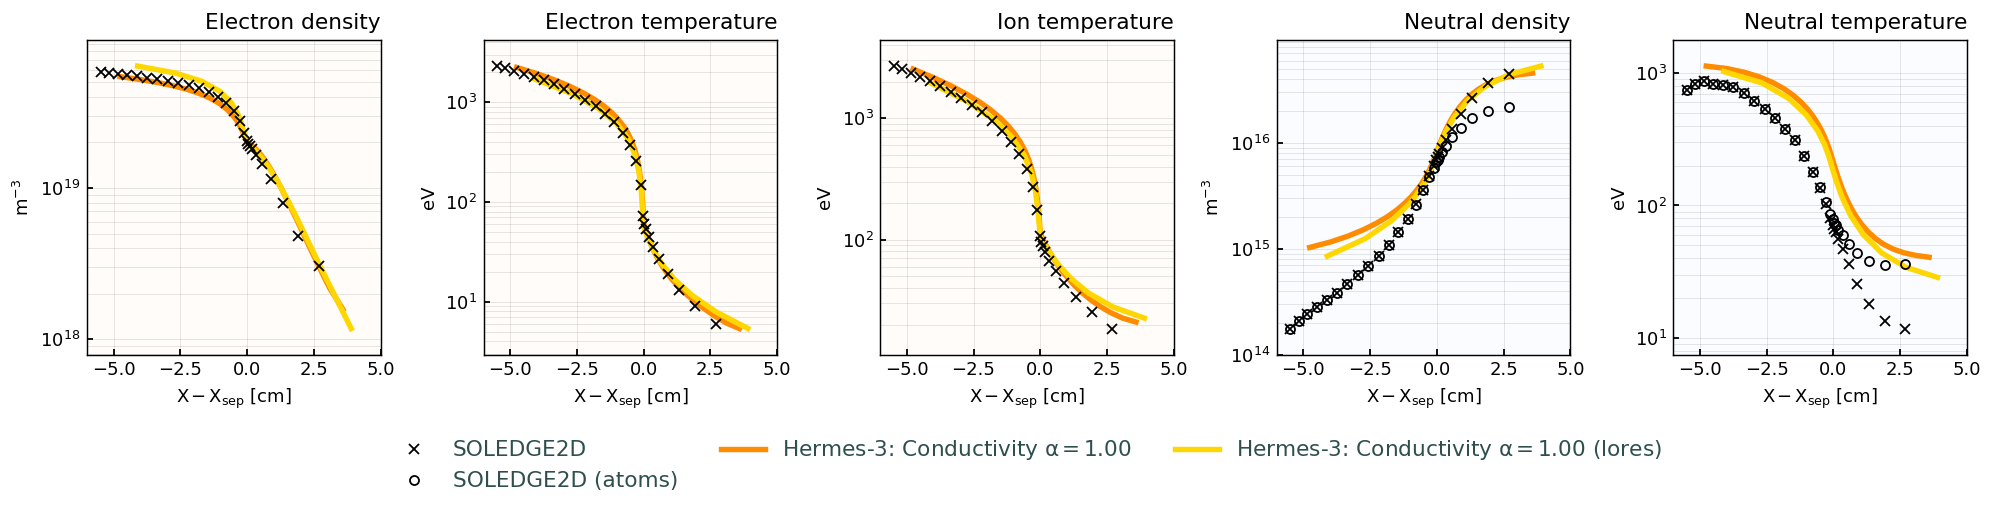

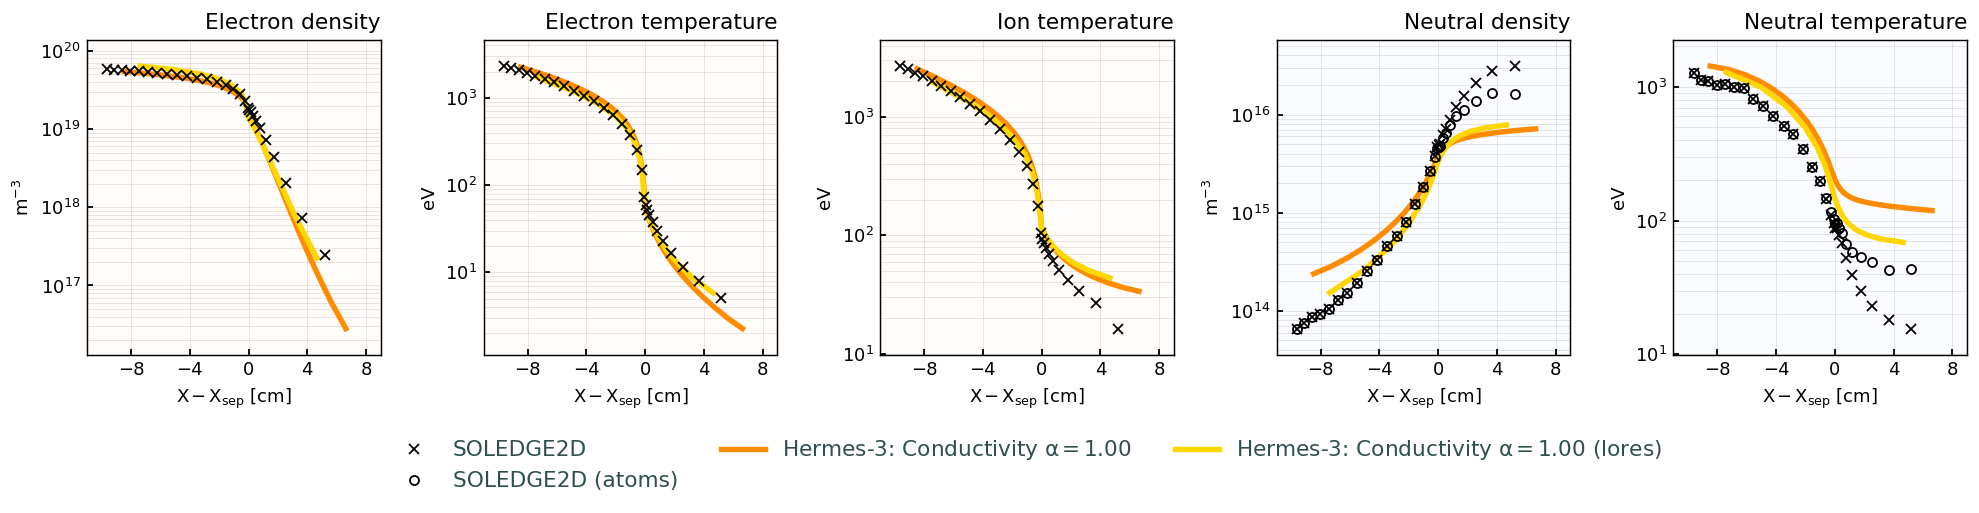

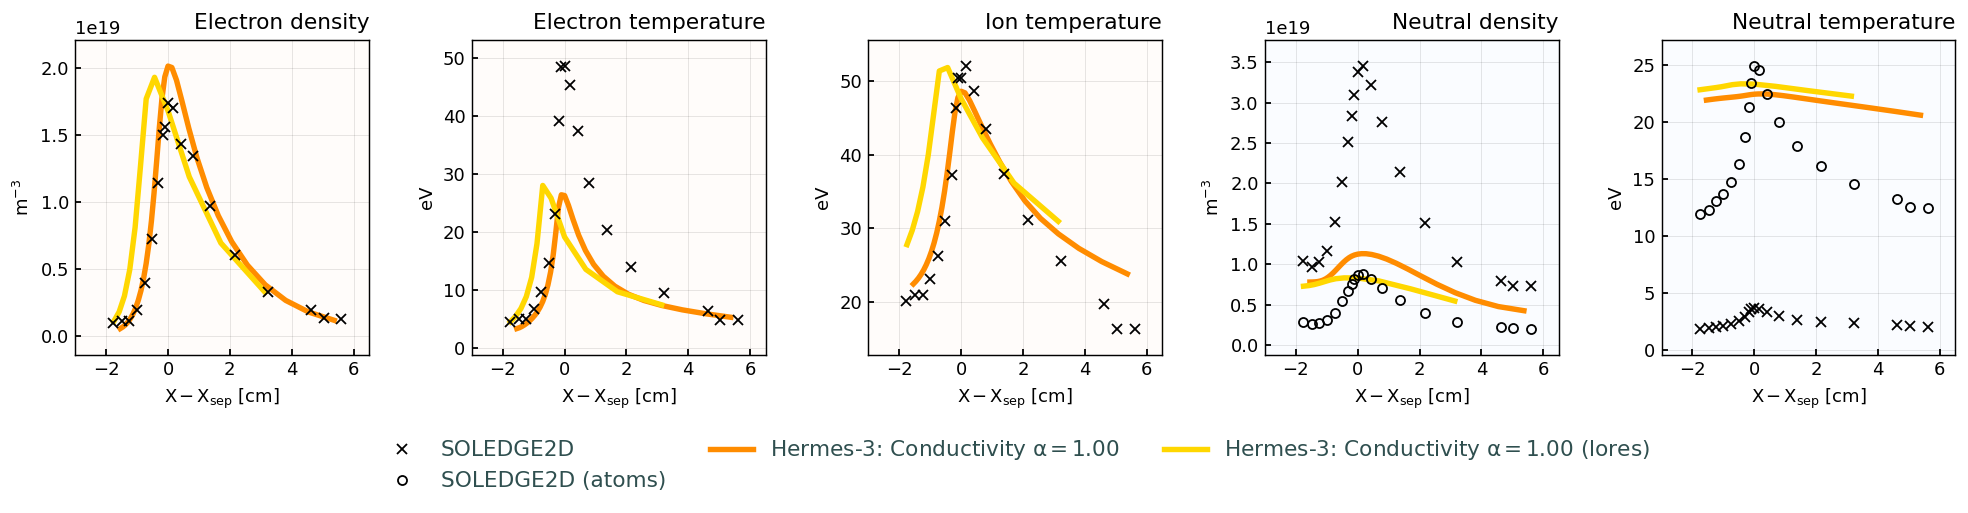

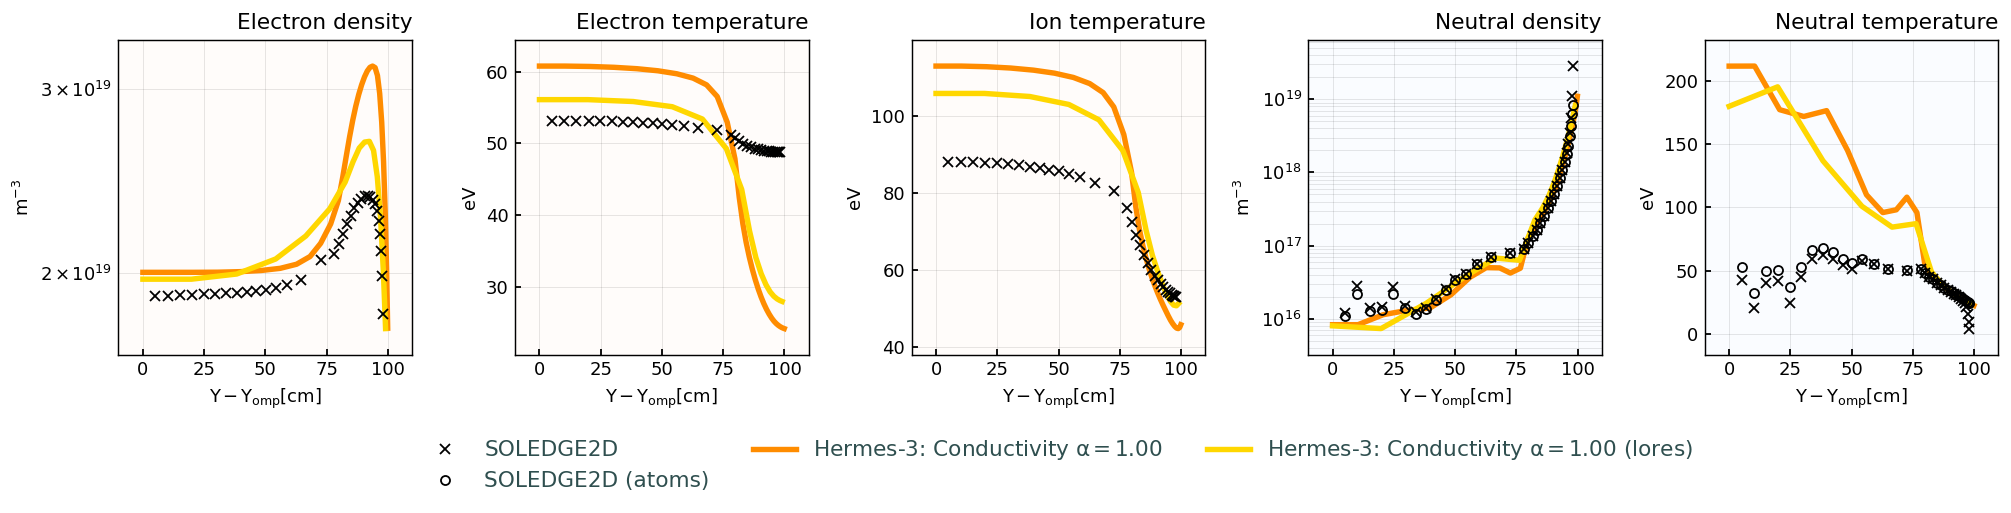

In [42]:
lineplot_compare(
    cases = { 
    "SOLEDGE2D" : dict(data=sl["tightwall_2e19"], color="black"),
    # r"Hermes-3: Conductivity $\alpha = 1.00$" : dict(data=hr['oldbase_nocondlim'], color = "darkorange"),
    # r"Hermes-3: Conductivity $\alpha = 0.25$" : dict(data=hr['oldbase'], color = "navy"),
    
    r"Hermes-3: Conductivity $\alpha = 1.00$" : dict(data=hr['base_nocondlim'], color = "darkorange"),
    # r"Hermes-3: Conductivity $\alpha = 0.25$" : dict(data=hr['base'], color = "navy"),
    
    r"Hermes-3: Conductivity $\alpha = 1.00$ (lores)" : dict(data=hr['widelobase_nocondlim'], color = "gold"),
    # r"Hermes-3: Conductivity $\alpha = 0.25$ (lores)" : dict(data=hr['widelobase'], color = "skyblue"),


    },
    regions = ["omp", "imp", "outer_lower", "outer_fieldline"],  
    params = ["Ne", "Te", "Td+", "Na", "Ta"],
    # params = ["Ne", "Te", "Td+", "Na", "Ta"],
    mode = "log",
    dpi = 100,
    lw = 2,
    legend_nrows =1,
    combine_molecules = True
)

# Compare against SOLPS no D2

In [49]:
sp.keys()

dict_keys(['noiz_core', 'tightwall_2e19', 'tightwall_noD2_1e19', 'tightwall_noD2_2e19', 'tightwall_noD2_3e19'])

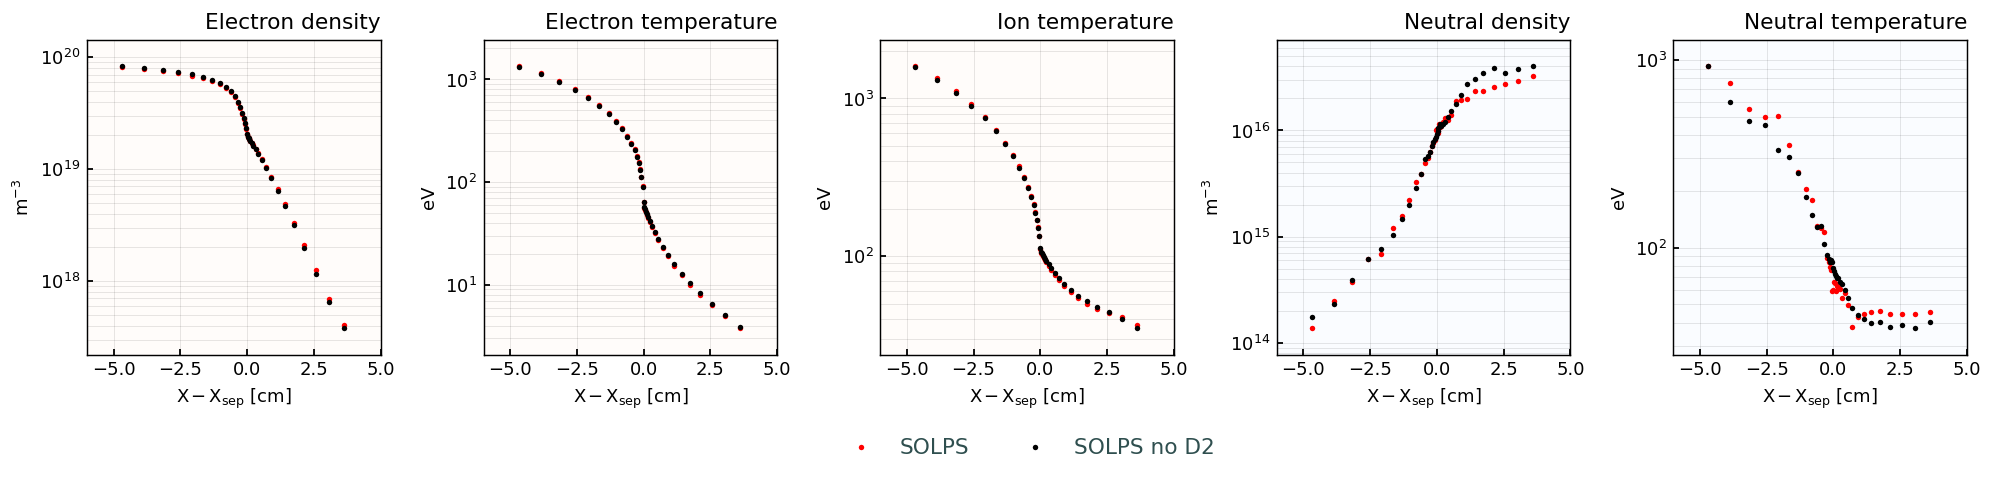

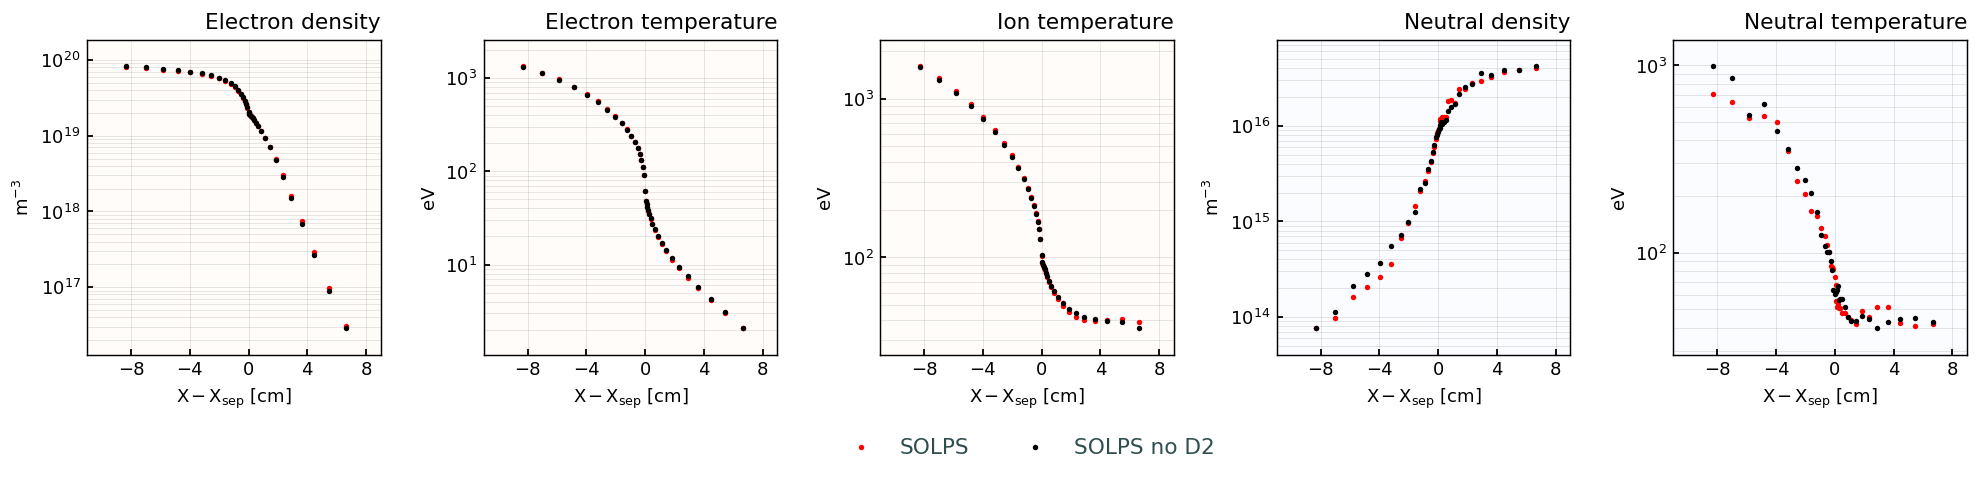

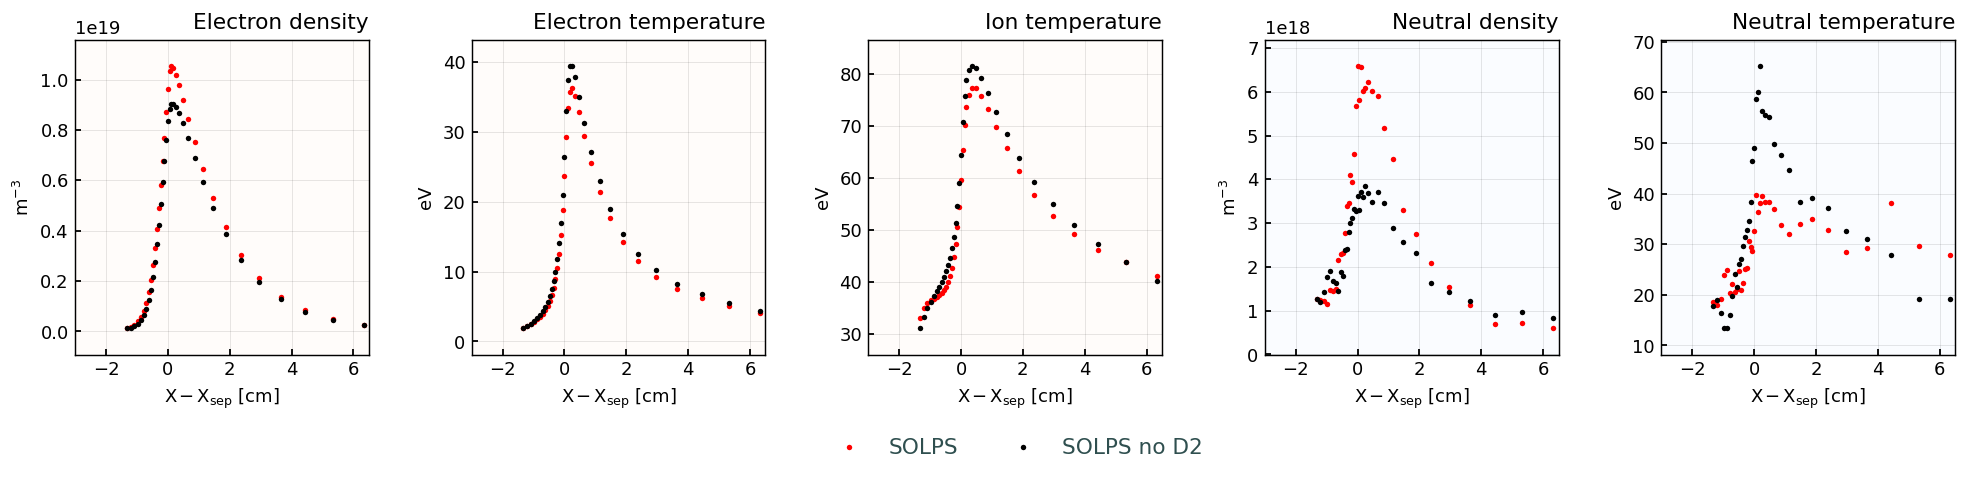

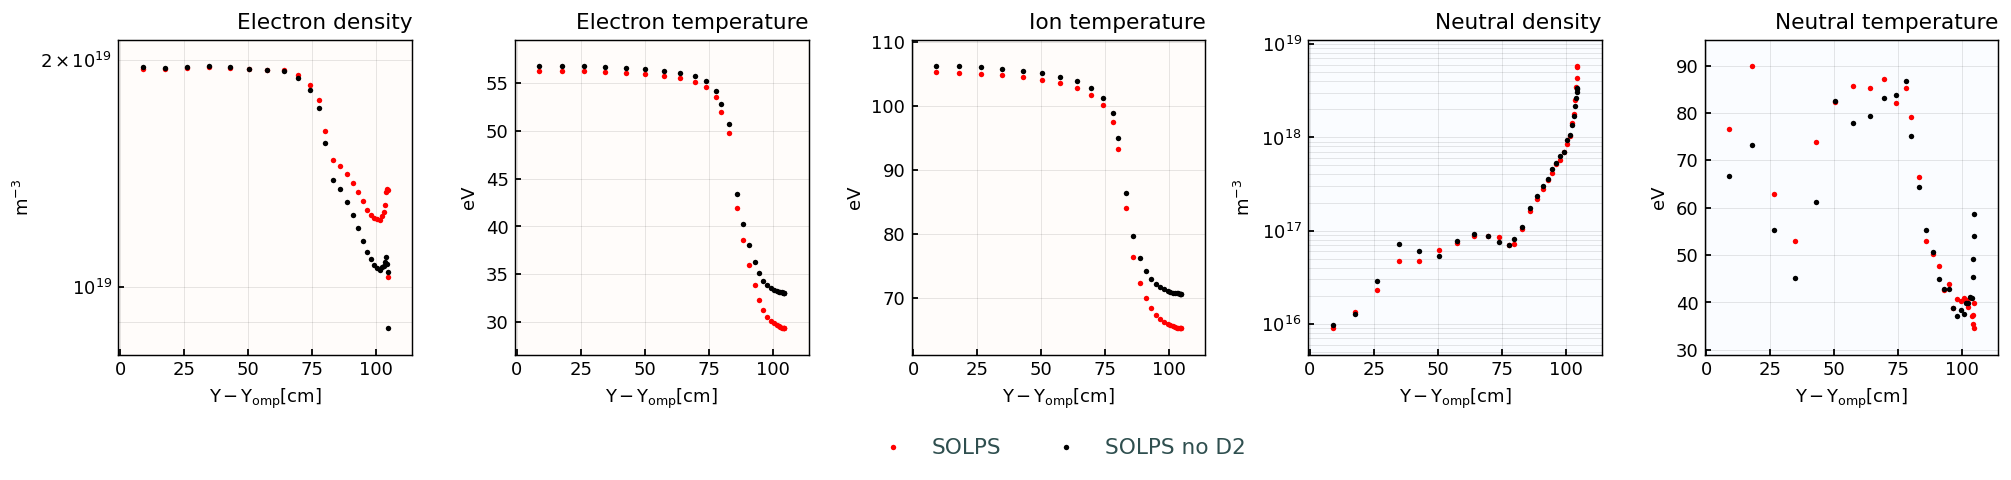

In [60]:
lineplot_compare(
    cases = { 
    # "SOLEDGE2D" : dict(data=sl["tightwall_2e19"], color="black"),
    "SOLPS" : dict(data=sp["tightwall_2e19"], color="red"),
    "SOLPS no D2" : dict(data=sp["tightwall_noD2_2e19"], color="black"),
    # r"Hermes-3: Conductivity $\alpha = 1.00$" : dict(data=hr['oldbase_nocondlim'], color = "darkorange"),
    # r"Hermes-3: Conductivity $\alpha = 0.25$" : dict(data=hr['oldbase'], color = "navy"),
    
    # r"Hermes-3: Conductivity $\alpha = 1.00$" : dict(data=hr['base_nocondlim'], color = "darkorange"),
    # r"Hermes-3: Conductivity $\alpha = 0.25$" : dict(data=hr['base'], color = "navy"),
    
    # r"Hermes-3: Conductivity $\alpha = 1.00$ (lores)" : dict(data=hr['lobase_nocondlim'], color = "gold"),
    # r"Hermes-3: Conductivity $\alpha = 0.25$ (lores)" : dict(data=hr['lobase'], color = "skyblue"),


    },
    regions = ["omp", "imp", "outer_lower", "outer_fieldline"],  
    params = ["Ne", "Te", "Td+", "Na", "Ta"],
    # params = ["Ne", "Te", "Td+", "Na", "Ta"],
    mode = "log",
    dpi = 100,
    lw = 2,
    legend_nrows =1,
    combine_molecules = False,
    solps_noD2 = True,
)

In [15]:
cs.keys()

dict_keys(['oldbase', 'oldbase_nocondlim', 'base', 'base_nocondlim', 'lobase', 'lobase_nocondlim', 'widelobase', 'widelobase_nocondlim'])

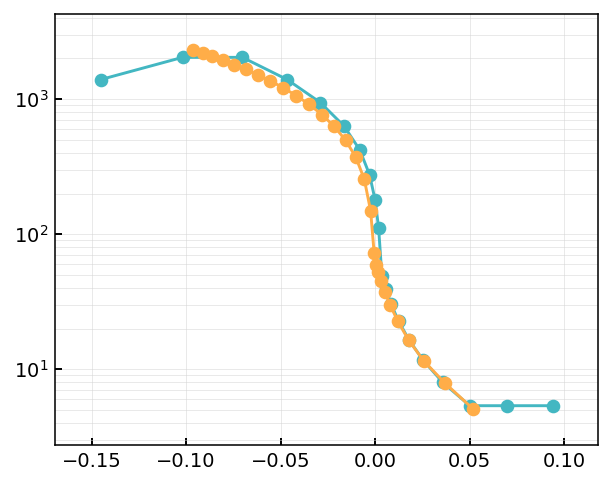

In [41]:
ds = cs["widelobase"].ds.isel(t=-1)
m = ds.metadata
reg = ds.hermesm.select_region("inner_midplane_a")
x = np.cumsum(reg["dr"])
x = x - x[m["ixseps1"] - m["MXG"]]

fig, ax = plt.subplots()
ax.plot(x, reg["Te"], marker = "o")
hrdata = sl["tightwall_2e19"].regions["imp"]



ax.plot(hrdata.index, hrdata["Te"], marker = "o")

ax.set_yscale("log")


In [13]:
cs.keys()

dict_keys(['lobase', 'widelobase', 'widelobasev3', 'widelobase_nocondlim'])

In [24]:
hr.keys()

dict_keys(['widelobase', 'widelobasev3', 'widelobase_nocondlim'])

In [30]:
hrtest = Hermesdata()
hrtest.read_case(cs["widelobase"].ds.isel(t=-1))

hrtest.regions["outer_lower"]

plt.plot(hrtest["pos"], 

Td+         Ta         Te            Ne         Pe  \
pos                                                                   
-0.013877  14.375335  11.602448   2.813712  8.085486e+17   0.364499   
-0.012174  17.062844  16.567737   3.106177  1.064945e+18   0.529985   
-0.010464  20.470568  18.523339   3.703440  1.506652e+18   0.893982   
-0.008749  24.168772  19.700360   4.573755  2.239345e+18   1.640984   
-0.007031  28.288679  20.569170   5.808027  3.428548e+18   3.190430   
-0.005310  32.990655  21.285888   7.653803  5.328291e+18   6.533946   
-0.003587  38.385552  21.896970  10.603311  8.292252e+18  14.087190   
-0.001863  44.422924  22.388502  15.593501  1.253339e+19  31.312857   
 0.000000  50.562090  22.724626  23.927514  1.724952e+19  66.127955   
 0.002697  51.529162  22.901574  22.629404  1.873845e+19  67.938704   
 0.007061  47.572031  22.788414  17.182416  1.650705e+19  45.442689   
 0.013933  41.261063  22.002644  12.261380  1.215042e+19  23.869377   
 0.024144  32.514525  20.233420   8.428175  7.804537e+18  10.538798   
 0.038454  24.427730  18.017898   6.033240  4.161223e+18   4.022370   
 0.057364  17.498309  15.382010   4.432178  1.870399e+18   1.328195   
 0.081040  10.843541  10.640664   3.240547  7.523589e+17   0.390619   

                  Pd+         Pa            Na  Sd+_iz  Rd+_ex    Rd+_rec  
pos                                                                        
-0.013877    1.862235  25.516773  1.372669e+19     NaN     NaN  -0.031137  
-0.012174    2.911313  25.594742  9.642223e+18     NaN     NaN  -0.055973  
-0.010464    4.941437  25.773103  8.684345e+18     NaN     NaN  -0.119179  
-0.008749    8.671336  26.097018  8.268112e+18     NaN     NaN  -0.280683  
-0.007031   15.539366  26.607708  8.073843e+18     NaN     NaN  -0.696447  
-0.005310   28.163670  27.297382  8.004217e+18     NaN     NaN  -1.759645  
-0.003587   50.997710  28.093349  8.007724e+18     NaN     NaN  -4.375442  
-0.001863   89.204386  28.881239  8.051567e+18     NaN     NaN  -9.960777  
 0.000000  139.737358  29.547262  8.115403e+18     NaN     NaN -18.063588  
 0.002697  154.702462  30.009896  8.178784e+18     NaN     NaN -21.490283  
 0.007061  125.814725  29.964970  8.207093e+18     NaN     NaN -17.179520  
 0.013933   80.323413  28.579927  8.107293e+18     NaN     NaN  -9.428264  
 0.024144   40.656963  24.948931  7.696128e+18     NaN     NaN  -3.816190  
 0.038454   16.286003  19.406975  6.722694e+18     NaN     NaN  -1.031487  
 0.057364    5.243734  14.403848  5.844604e+18     NaN     NaN  -0.192995  
 0.081040    1.307093  12.043422  7.064327e+18     NaN     NaN  -0.028147

0.053745299644415157
0.03139315505017698


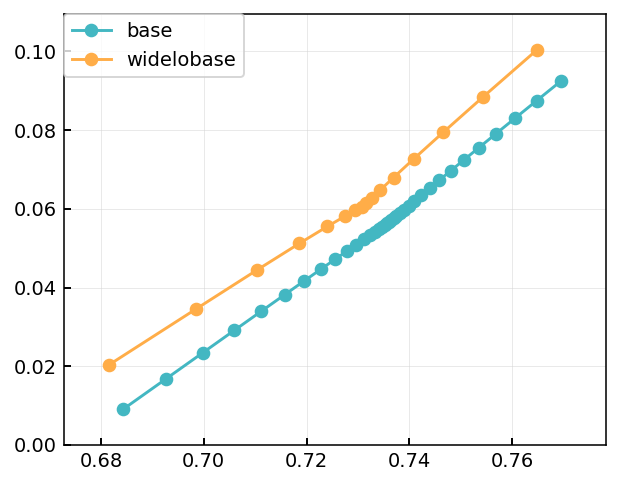

In [34]:
fig, ax = plt.subplots()
for name in ["base", "widelobase"]:
    ds = cs[name].ds.isel(t=-1)
    reg = ds.hermesm.select_region("outer_midplane_a").isel(x = slice(2,-2))
    # ax.plot(reg["R"], reg["Z"], label = name, marker = "o")
    ax.plot(reg["R"], np.cumsum(reg["dr"]), marker = "o", label = name)
    # print(np.cumsum(reg["dr"].values))
    
    print(hr[name].regions["outer_lower"].index[-1])
    
ax.legend()


## Cond lim

In [43]:
cs.keys()

dict_keys(['base', 'base_nocondlim', 'widelobase', 'widelobase_tunealpha'])

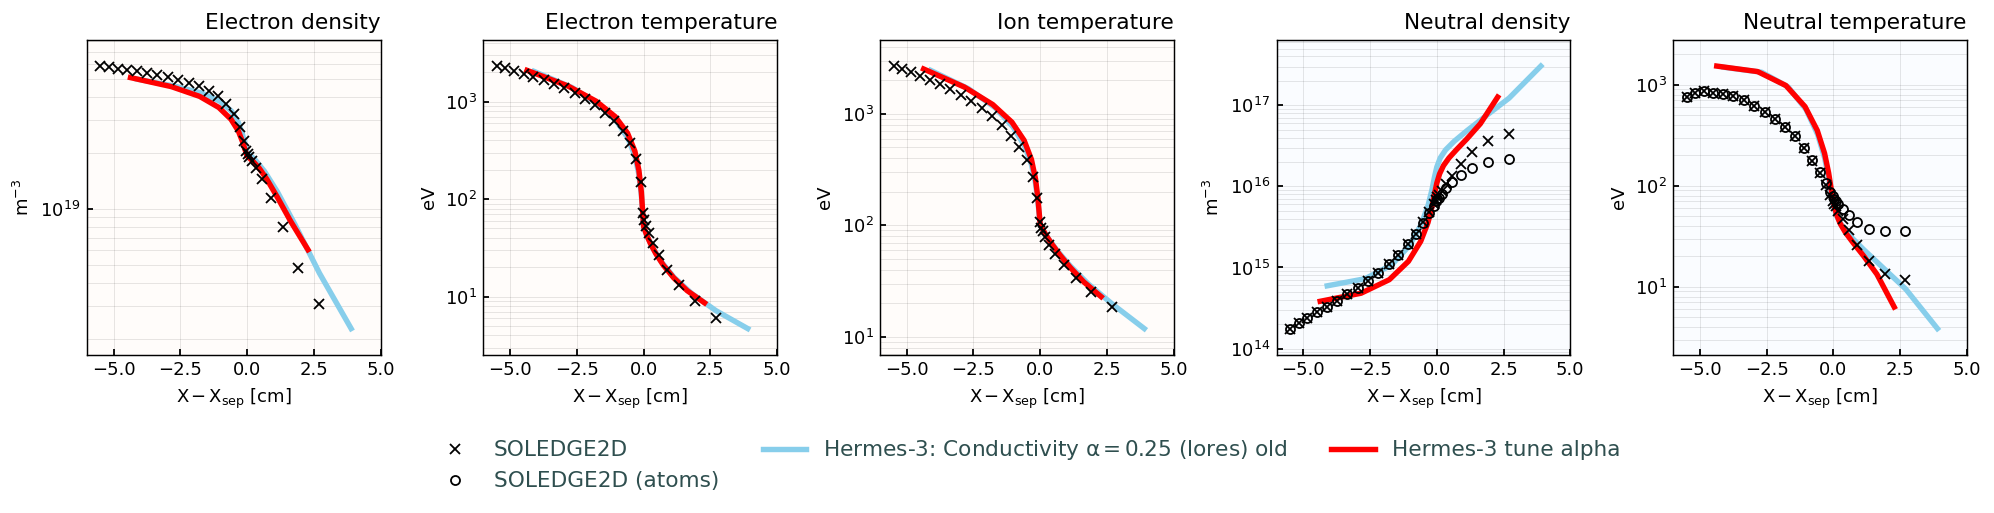

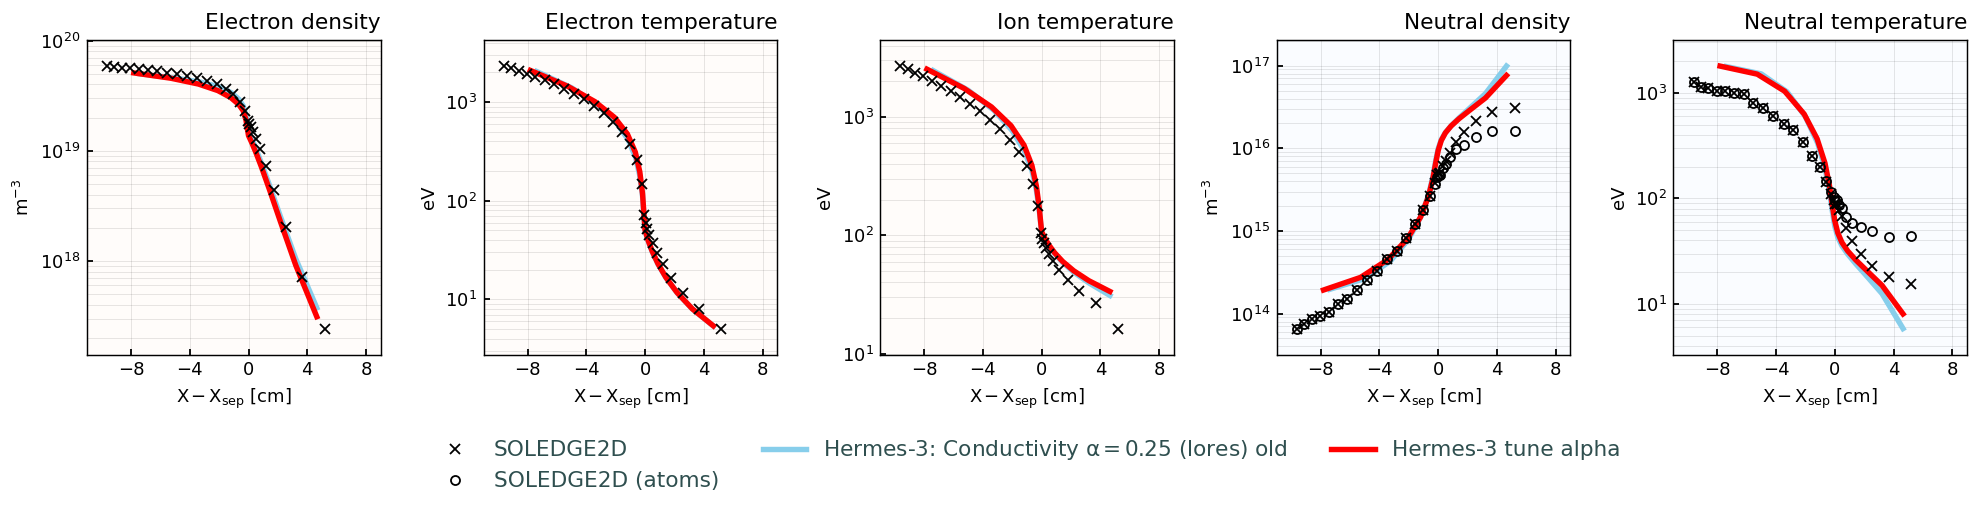

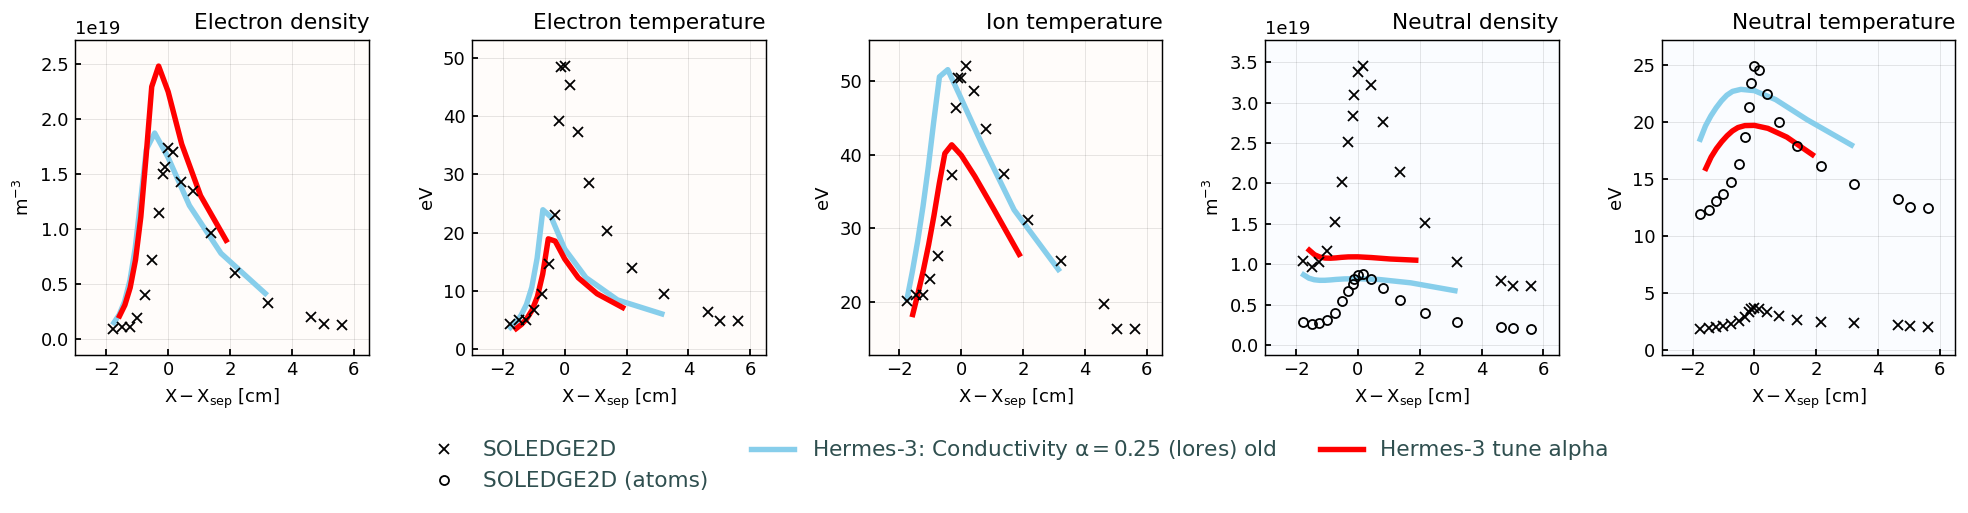

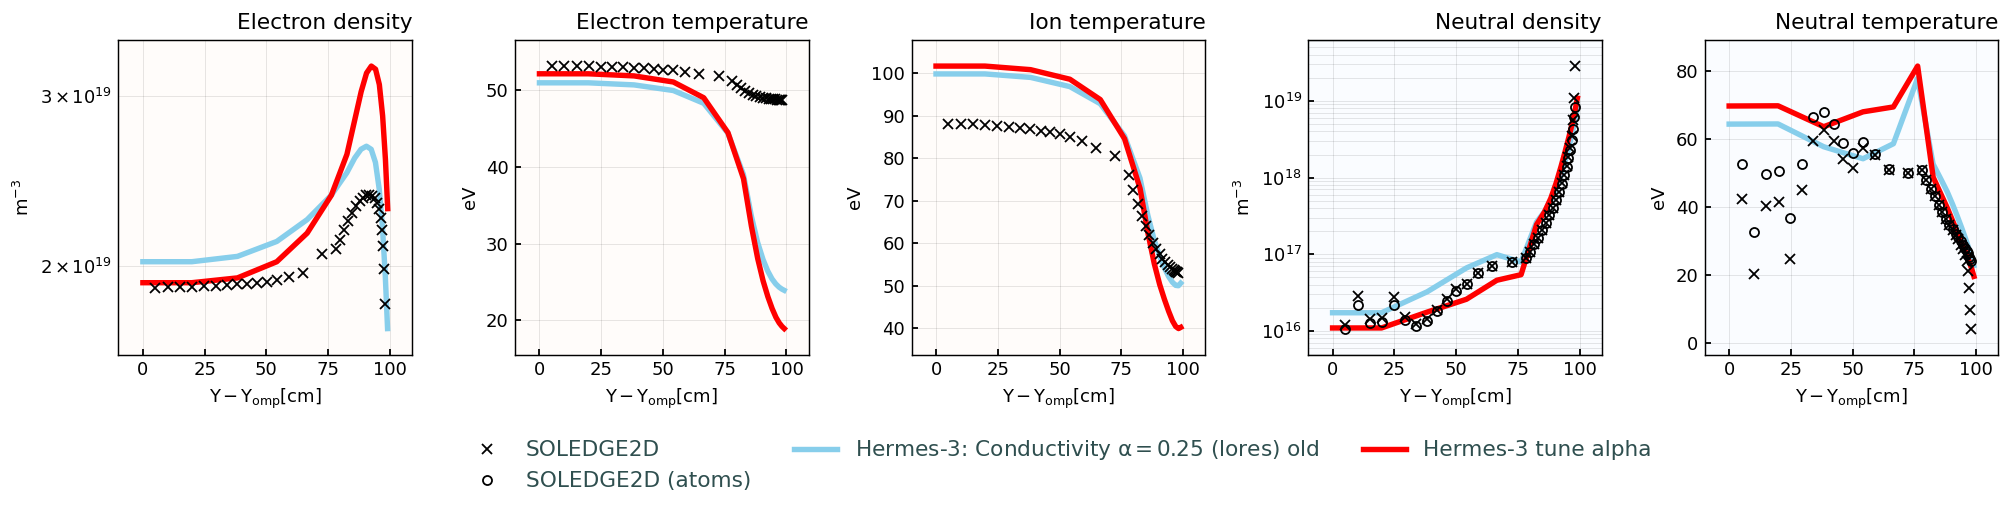

In [45]:
lineplot_compare(
    cases = { 
    "SOLEDGE2D" : dict(data=sl["tightwall_2e19"], color="black"),
    # r"Hermes-3: Conductivity $\alpha = 1.00$" : dict(data=hr['oldbase_nocondlim'], color = "darkorange"),
    # r"Hermes-3: Conductivity $\alpha = 0.25$" : dict(data=hr['oldbase'], color = "navy"),
    
    # r"Hermes-3: Conductivity $\alpha = 1.00$" : dict(data=hr['base_nocondlim'], color = "darkorange"),
    # r"Hermes-3: Conductivity $\alpha = 0.25$" : dict(data=hr['base'], color = "navy"),
    
    # r"Hermes-3: Conductivity $\alpha = 1.00$ (lores)" : dict(data=hr['widelobase_nocondlim'], color = "gold"),
    r"Hermes-3: Conductivity $\alpha = 0.25$ (lores) old" : dict(data=hr['widelobase'], color = "skyblue"),
    # r"Hermes-3: Conductivity $\alpha = 0.25$ (lores)" : dict(data=hr['widelobasev3'], color = "red"),
    r"Hermes-3 tune alpha" : dict(data=hr['widelobase_tunealpha'], color = "red"),


    },
    regions = ["omp", "imp", "outer_lower", "outer_fieldline"],  
    params = ["Ne", "Te", "Td+", "Na", "Ta"],
    # params = ["Ne", "Te", "Td+", "Na", "Ta"],
    mode = "log",
    dpi = 100,
    lw = 2,
    legend_nrows =1,
    combine_molecules = True
)

# Wall heat fluxes

## SOLEDGE

In [37]:
plt.close("all")

self = SOLEDGEcase(soledgecases["tightwall_2e19"])
slcWfluxes = self.get_wall_flux_summary()
display(slcWfluxes)

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


get_wall_triangle
get_wall_triangles
get_wall_triangles.2: Completed
get_wall_triangle: Completed

 ********** 
 **********
get_wall_triangle
get_wall_triangles
get_wall_triangles.2: Completed
get_wall_triangle: Completed


outer_wall  inner_wall   targets       pfr
E_Total                    0.232057    0.038567  1.265799  0.102674
E_incident_Electron        0.000000    0.000000  0.553930  0.000234
E_incident_Ions            0.000000    0.000000  0.963330  0.001283
E_incident_Atoms           0.210326    0.026182  0.070519  0.081643
E_incident_Molecules       0.000000    0.000000  0.000000  0.000000
E_Radiation                0.021104    0.012336  0.019350  0.019273
E_Radiation_Atoms          0.021104    0.012336  0.019350  0.019273
E_Rad_Recombination        0.000000    0.000000 -0.451635 -0.000603
E_Recombination_in_Wall    0.000627    0.000048  0.110306  0.000843

In [38]:
hflows = []
for case in cs:

    df = calculate_neutral_heat_balance(cs[case].ds.isel(t=-1), mode = "reflection")
    df = df.loc[["total"], :]
    df.index = [case]
    
    hflows.append(df)
    
hflows = pd.concat(hflows, axis = 0)

In [100]:
len([["SOLEDGE2D"] + list(df_nolim.index)][0] + list(df_lim.index))

9

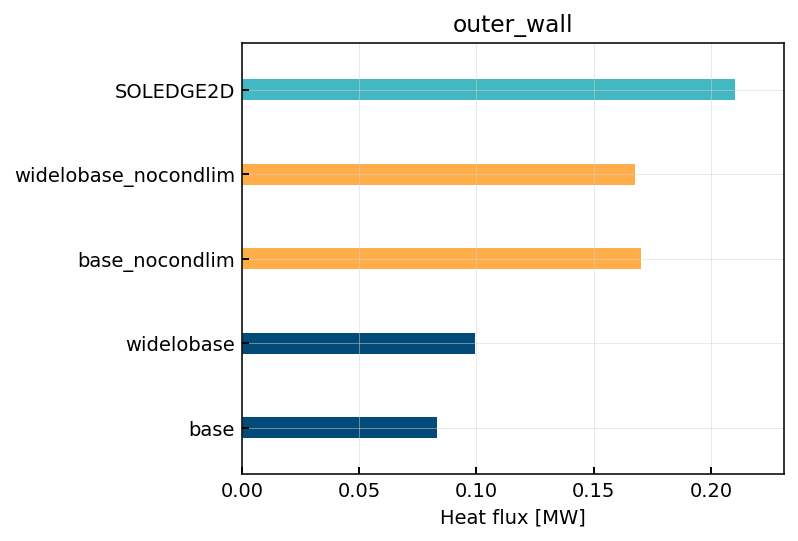

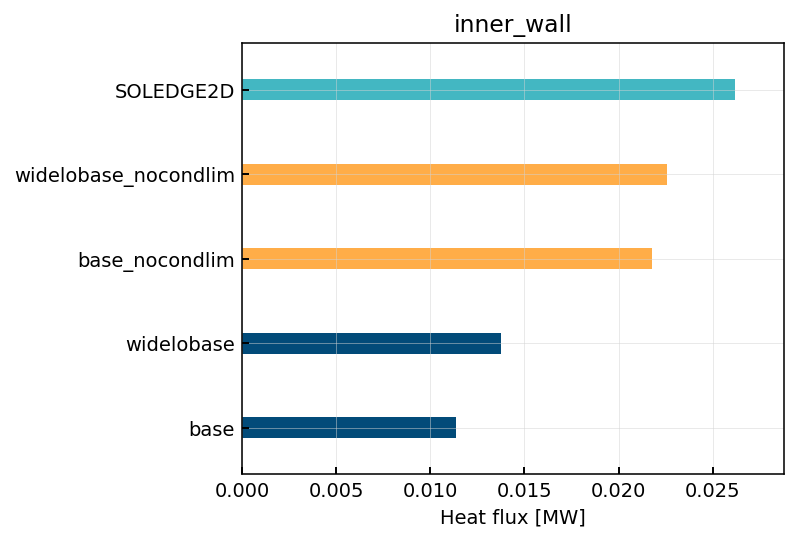

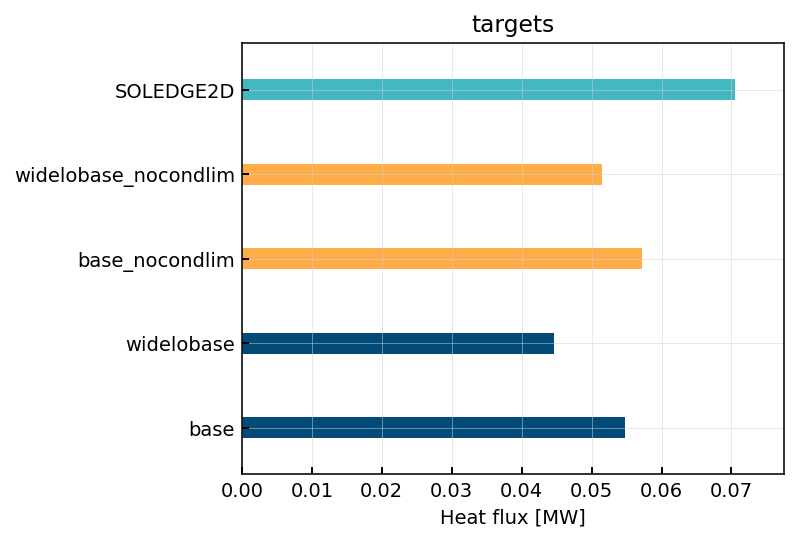

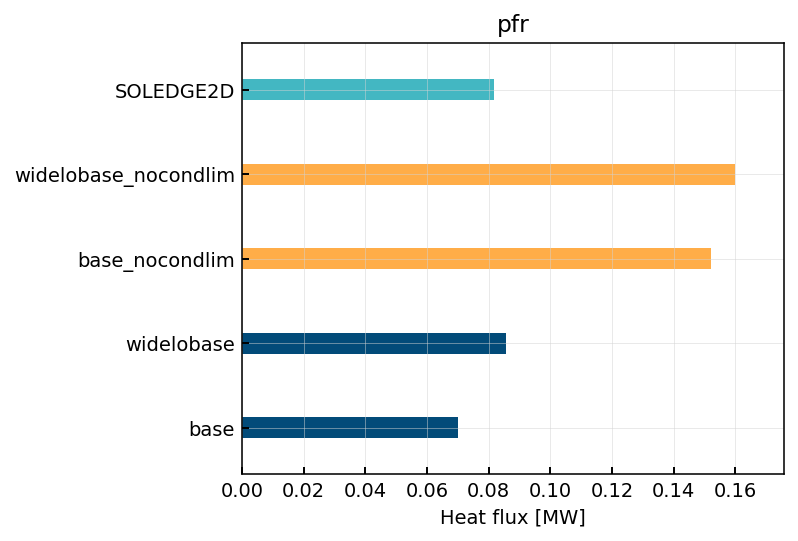

In [40]:
for loc in ["outer_wall", "inner_wall", "targets", "pfr"]:

    fig, ax = plt.subplots()
    dfplot = hflows

    df_nolim = dfplot.loc[[x for x in dfplot.index if "condlim" in x], :]
    df_lim = dfplot.loc[[x for x in dfplot.index if "condlim" not in x], :]
    x = np.arange(len(dfplot)+1)
    width = 0.25
    # for i, case in enumerate(dfplot.index):
        # offset = width * i

    ax.barh(len(dfplot), slcWfluxes.loc["E_incident_Atoms", loc], width)
    ax.barh(np.arange(len(df_nolim)) + len(df_nolim), df_nolim[loc], width)
    ax.barh(np.arange(len(df_lim)), df_lim[loc], width)
        # ax.bar_label(rects, padding = 3)
        
    ax.set_yticks(x, list(df_lim.index) + [list(df_nolim.index)][0]  + ["SOLEDGE2D"])
    ax.set_xlabel("Heat flux [MW]")
    ax.set_title(loc)

In [69]:
hflows["outer_wall"].iloc[i]

0.16756820069677467

In [58]:
df = calculate_neutral_heat_balance(cs[case].ds.isel(t=-1), mode = "reflection")


In [59]:
df

outer_wall  inner_wall  targets       pfr
d        0.051298    0.005709  0.02166  0.045688
d*            NaN         NaN      NaN       NaN
total    0.051298    0.005709  0.02166  0.045688

In [62]:
df.loc[["total"], :]

outer_wall  inner_wall  targets       pfr
total    0.051298    0.005709  0.02166  0.045688

In [26]:
for case in cs:
    ds = cs[case].ds.isel(t=-1)
    # if "sd+_src" in ds.data_vars:
    hfi = (ds["Pd+_src"] * ds["dv"] * 1e-6 * 3/2).sum().values
    if "Sd_src" in ds.data_vars:
        pf = (ds["Sd_src"] * ds["dv"]).sum().values
    else:
        pf = 0

    
    print(f"{case} : {pf:.3e}")

hiresbase : 1.210e+21
dirichlet : 1.200e+21
xpoint : 1.200e+21
floorfix_allfields : 1.200e+21


In [19]:
[print(x) for x in ds.data_vars if "src" in x]

Pd+_src
Pd_src
Pe_src
Sd+_src
Sd_src


[None, None, None, None, None]

## State of Td

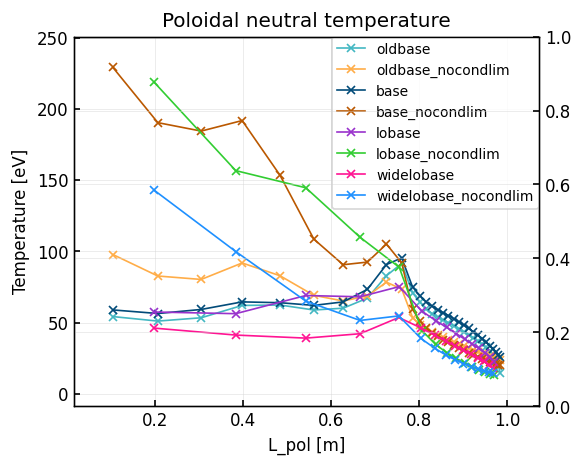

In [8]:

# colors = mpl.cm.get_cmap("plasma", len(cases))(range(len(cases)))
fig, ax = plt.subplots(dpi = 120)

cases = cs.keys()

ax2 = ax.twinx()

# colors = ["teal", "darkorange", "firebrick"]

for i, case in enumerate(cases):
    ds = cs[case].ds.isel(t=-1)
    m = ds.metadata
    # fl = ds.isel(x = m["ixseps1"], theta = slice(41,-2))
    fl = ds.hermesm.select_custom_sol_ring(m["ixseps1"], region = "outer_lower").squeeze()
    dist = np.cumsum(fl["dl"])
    
    if any([x in case for x in ["form2", "form4"]]):
        marker = "x"
    elif any([x in case for x in ["form1", "form3"]]):
        marker = "+"
    else:
        marker = "x"
    ax.plot(dist, fl["Td"], label = case, marker = marker, ms = 5, lw = 1, 
            # color = colors[i]
            )
    
    # try:
    # try:
    #     ax2.plot(dist, fl["Sd+_rec"], label = case, marker = marker, ms = 5, lw = 1)
    # except:
    #     pass
                # color = colors[i])
# ax.plot(dist, fl["Td+"],  marker = "o", ms = 5, lw = 0.5, c = colors[i])
# ax.set_yscale("symlog", linthresh = 1e-3)
ax.set_xlabel("L_pol [m]")
ax.set_ylabel("Temperature [eV]")
ax.set_title("Poloidal neutral temperature")
ax.legend(fontsize="small")
# ax.set_ylim(0,200)

# Detailed analysis

## OMP - profiles

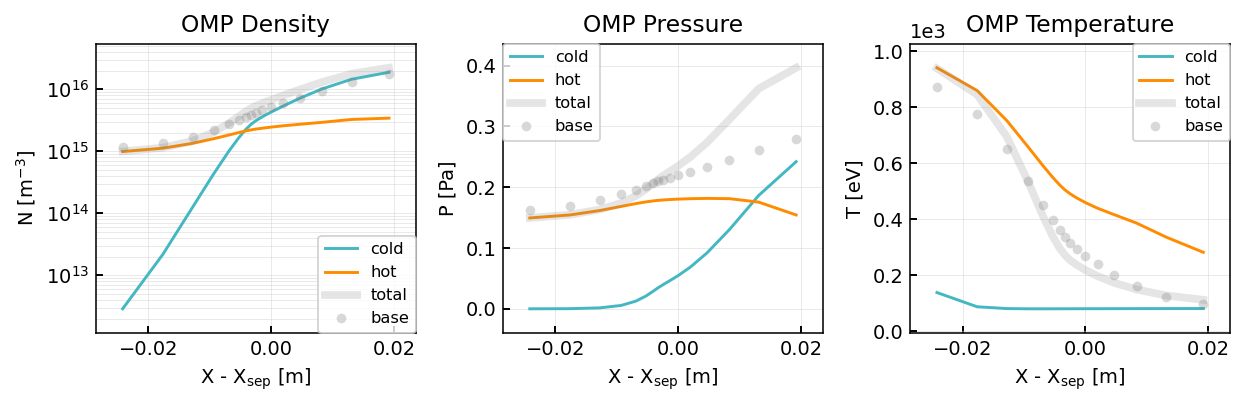

In [6]:
ds = cs["hnthresh20"].ds.isel(t=-1)
reg = ds.hermesm.select_region("outer_midplane_a").isel(x = slice(2,-2))
reg2 = cs["base"].ds.hermesm.select_region("outer_midplane_a").isel(x = slice(2,-2), t = -1)
title = "OMP"

fig, axes = plt.subplots(1,3, figsize = (9,3))

x = np.cumsum(reg["dr"]).values
x = x - x[ds.metadata["ixseps1"]]
kwargs = dict(marker = "o", ms = 0)
totkwargs = dict(c = "grey", lw = 4, alpha = 0.2)
basekwargs = dict(c = "grey", lw = 0, marker = "o", ms = 5, alpha = 0.3, markeredgewidth = 0)

ax = axes[0]
ax.set_title("OMP Density")
ax.set_yscale("log")
ax.set_ylabel("N [$m^{-3}$]")
ax.plot(x, reg["Nd"], label = "cold", **kwargs)
ax.plot(x, reg["Nd*"], label = "hot", c = "darkorange", **kwargs)
ax.plot(x, reg["Nd"]+reg["Nd*"], label = "total", **totkwargs)
ax.plot(x, reg2["Nd"], label = "base", **basekwargs)

ax = axes[1]
ax.set_title("OMP Pressure")
ax.set_ylabel("P [Pa]")
ax.plot(x, reg["Pd"], label = "cold", **kwargs)
ax.plot(x, reg["Pd*"], label = "hot", c = "darkorange", **kwargs)
ax.plot(x, reg["Pd"]+reg["Pd*"], label = "total", **totkwargs)
ax.plot(x, reg2["Pd"], label = "base", **basekwargs)

ax = axes[2]
ax.set_title("OMP Temperature")
ax.set_ylabel("T [eV]")
ax.plot(x, reg["Td"], label = "cold", **kwargs)
ax.plot(x, reg["Td*"], label = "hot", c = "darkorange", **kwargs)
ax.plot(x, (reg["Pd"]+reg["Pd*"])/(reg["Nd*"]+reg["Nd"])/constants("q_e"), label = "total", **totkwargs)
ax.plot(x, reg2["Td"], label = "base", **basekwargs)


for ax in axes:
    ax.legend(fontsize = "small")
    ax.set_xlabel("X - $X_{sep}$ [m]")

    ax.set_xscale("linear")
    
fig.tight_layout()


## OMP - transport

In [8]:
for case in cs:
    cs[case].ds = calculate_radial_fluxes(cs[case].ds)

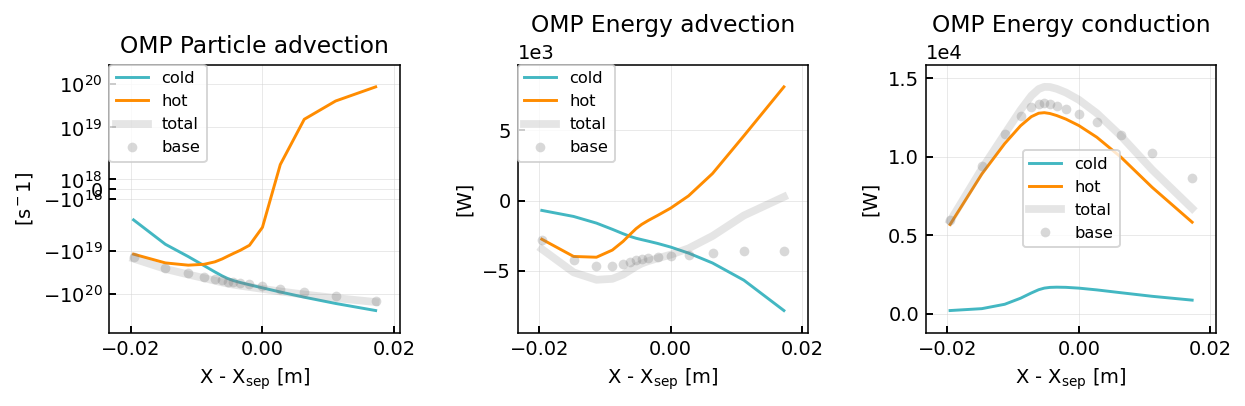

In [10]:
ds = cs["main"].ds.isel(t=-1)
reg = ds.hermesm.select_region("outer_midplane_a").isel(x = slice(3,-2))
reg2 = cs["base"].ds.hermesm.select_region("outer_midplane_a").isel(x = slice(3,-2), t = -1)
title = "OMP"

fig, axes = plt.subplots(1,3, figsize = (9,3))

x = np.cumsum(reg["dr"]).values
x = x - x[ds.metadata["ixseps1"]]
kwargs = dict(marker = "o", ms = 0)
totkwargs = dict(c = "grey", lw = 4, alpha = 0.2)
basekwargs = dict(c = "grey", lw = 0, marker = "o", ms = 5, alpha = 0.3, markeredgewidth = 0)

ax = axes[0]
ax.set_title("OMP Particle advection")
ax.set_yscale("symlog", linthresh = 5e18)
ax.set_ylabel("[$s^-1$]")
ax.plot(x, reg["pf_perp_diff_L_d"], label = "cold", **kwargs)
ax.plot(x, reg["pf_perp_diff_L_d*"], label = "hot", c = "darkorange", **kwargs)
ax.plot(x, reg["pf_perp_diff_L_d"]+reg["pf_perp_diff_L_d*"], label = "total", **totkwargs)
ax.plot(x, reg2["pf_perp_diff_L_d"], label = "base", **basekwargs)

ax = axes[1]
ax.set_title("OMP Energy advection")
ax.set_ylabel("[W]")
ax.plot(x, reg["hf_perp_conv_L_d"], label = "cold", **kwargs)
ax.plot(x, reg["hf_perp_conv_L_d*"], label = "hot", c = "darkorange", **kwargs)
ax.plot(x, reg["hf_perp_conv_L_d"]+reg["hf_perp_conv_L_d*"], label = "total", **totkwargs)
ax.plot(x, reg2["hf_perp_conv_L_d"], label = "base", **basekwargs)

ax = axes[2]
ax.set_title("OMP Energy conduction")
ax.set_ylabel("[W]")
ax.plot(x, reg["hf_perp_diff_L_d"], label = "cold", **kwargs)
ax.plot(x, reg["hf_perp_diff_L_d*"], label = "hot", c = "darkorange", **kwargs)
ax.plot(x, (reg["hf_perp_diff_L_d"]+reg["hf_perp_diff_L_d*"]), label = "total", **totkwargs)
ax.plot(x, reg2["hf_perp_diff_L_d"], label = "base", **basekwargs)


for ax in axes:
    ax.legend(fontsize = "small")
    ax.set_xlabel("X - $X_{sep}$ [m]")

    ax.set_xscale("linear")
    
fig.tight_layout()


## OMP - sources

Text(0.5, 0, 'X - $X_{sep}$ [m]')

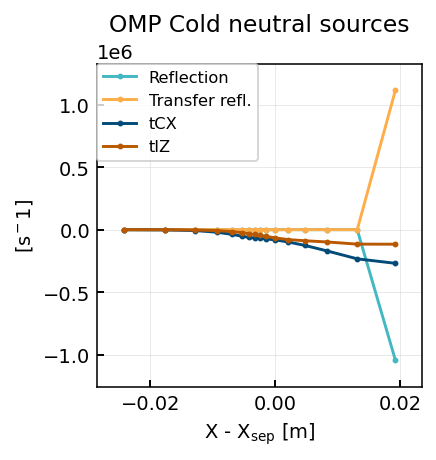

In [11]:
ds = cs["hnthresh20"].ds.isel(t=-1)
reg = ds.hermesm.select_region("outer_midplane_a").isel(x = slice(2,-2)).squeeze()

fig, ax = plt.subplots(1, figsize = (3,3))

x = np.cumsum(reg["dr"]).values
x = x - x[ds.metadata["ixseps1"]]
kwargs = dict(marker = "o", ms = 2)

ax.set_title("OMP Cold neutral sources")
# ax.set_yscale("symlog", linthresh = 5e18)
ax.set_ylabel("[$s^-1$]")
ax.plot(x, reg["Ed_wall_refl"], label = "Reflection", **kwargs)
ax.plot(x, reg["Edd*_wall_refl"], label = "Transfer refl.", **kwargs)
# ax.plot(x, reg["Edd+_cx"], label = "CX", **kwargs)
ax.plot(x, reg["Edd+_cxt"], label = "tCX", **kwargs)
ax.plot(x, reg["Edd+_iz"]*-1, label = "tIZ", **kwargs)

ax.legend(fontsize = "small")
ax.set_xlabel("X - $X_{sep}$ [m]")



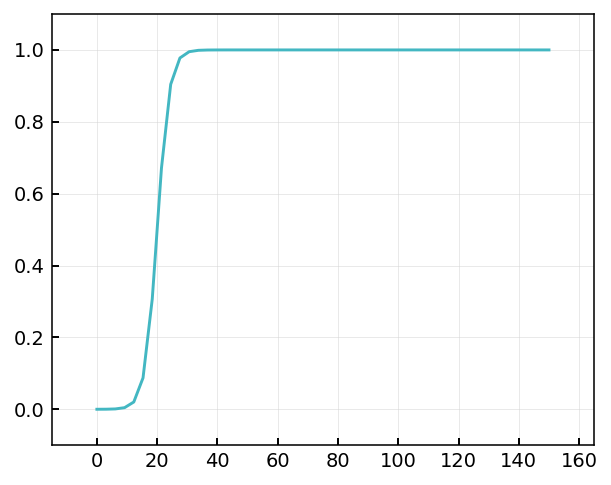

In [128]:
x = np.linspace(0,150)

y = 1 / (1 + np.exp(-0.5*(x - 20)))

fig, ax = plt.subplots()
ax.plot(x,y)

## FIeld line

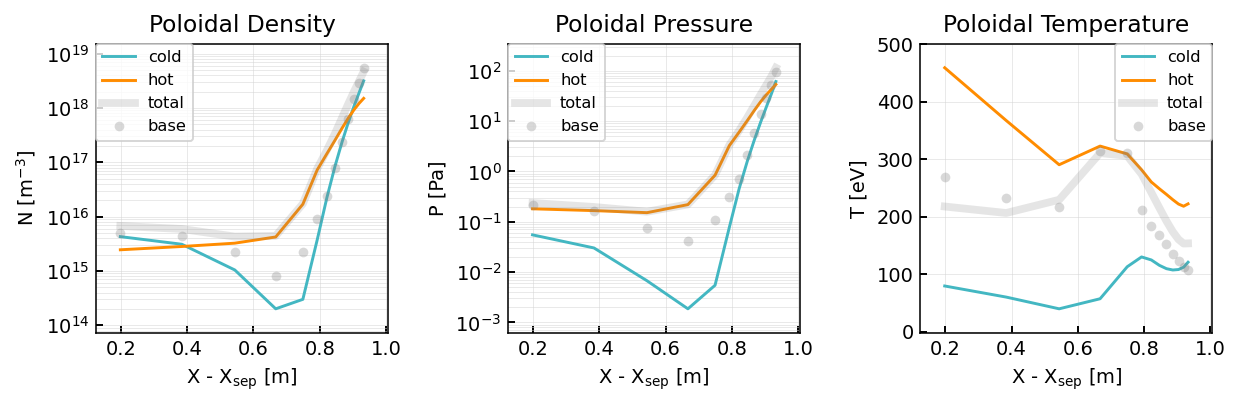

In [12]:
ds = cs["hnthresh20"].ds
reg = ds.hermesm.select_custom_sol_ring(11, region = "outer_lower").isel(theta = slice(None,-2), t = -1).squeeze()
reg2 = cs["base"].ds.hermesm.select_custom_sol_ring(11, region = "outer_lower").isel(theta = slice(None,-2), t = -1).squeeze()
title = "Field line"

fig, axes = plt.subplots(1,3, figsize = (9,3))

x = np.cumsum(reg["dl"]).values

kwargs = dict(marker = "o", ms = 0)
totkwargs = dict(c = "grey", lw = 4, alpha = 0.2)
basekwargs = dict(c = "grey", lw = 0, marker = "o", ms = 5, alpha = 0.3, markeredgewidth = 0)

ax = axes[0]
ax.set_title("Poloidal Density")
ax.set_yscale("log")
ax.set_ylabel("N [$m^{-3}$]")
ax.plot(x, reg["Nd"], label = "cold", **kwargs)
ax.plot(x, reg["Nd*"], label = "hot", c = "darkorange", **kwargs)
ax.plot(x, reg["Nd"]+reg["Nd*"], label = "total", **totkwargs)
ax.plot(x, reg2["Nd"], label = "base", **basekwargs)

ax = axes[1]
ax.set_title("Poloidal Pressure")
ax.set_yscale("log")
ax.set_ylabel("P [Pa]")
ax.plot(x, reg["Pd"], label = "cold", **kwargs)
ax.plot(x, reg["Pd*"], label = "hot", c = "darkorange", **kwargs)
ax.plot(x, reg["Pd"]+reg["Pd*"], label = "total", **totkwargs)
ax.plot(x, reg2["Pd"], label = "base", **basekwargs)

ax = axes[2]
ax.set_title("Poloidal Temperature")
ax.set_ylabel("T [eV]")
ax.plot(x, reg["Td"], label = "cold", **kwargs)
ax.plot(x, reg["Td*"], label = "hot", c = "darkorange", **kwargs)
ax.plot(x, (reg["Pd"]+reg["Pd*"])/(reg["Nd*"]+reg["Nd"])/constants("q_e"), label = "total", **totkwargs)
ax.plot(x, reg2["Td"], label = "base", **basekwargs)


for ax in axes:
    ax.legend(fontsize = "small")
    ax.set_xlabel("X - $X_{sep}$ [m]")

    ax.set_xscale("linear")
    
fig.tight_layout()


# 2D plots

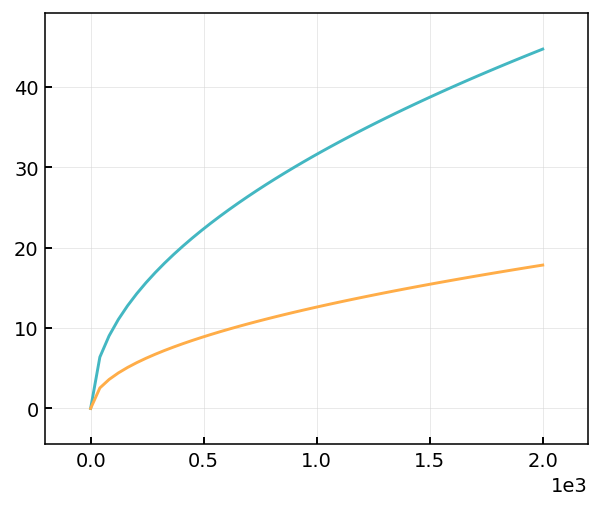

In [6]:
T = np.linspace(0,2000)
y1 = np.sqrt(T)
y2 = 0.25 * np.sqrt(8 * T/ np.pi)

fig, ax = plt.subplots()
ax.plot(T, y1)
ax.plot(T, y2)

## Hot neutral diags

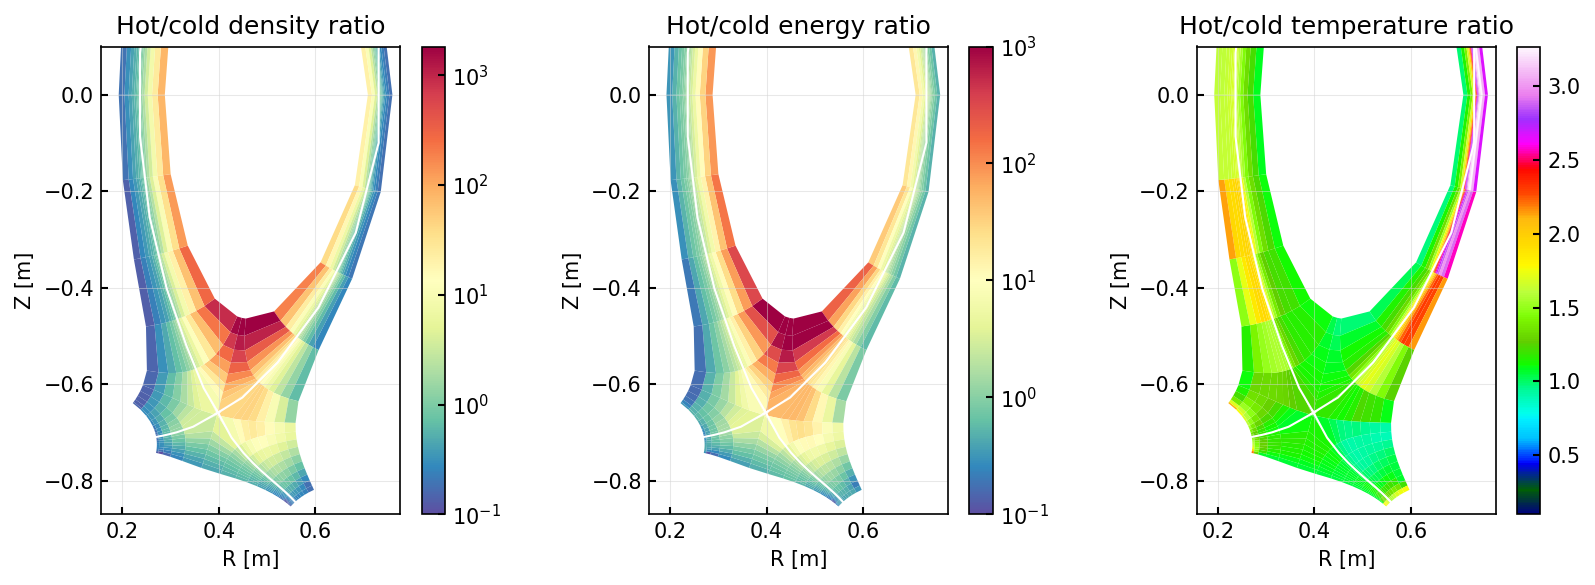

In [13]:
fig, axes = plt.subplots(1,3, dpi = 150, figsize = (11,4))

ds = cs["main"].ds
if "t" in ds.dims: ds = ds.isel(t=-1)
sepkwargs = dict(linewidth = 1, color = "white", linestyle = "-")
(ds["Nd*"] / ds["Nd"]).hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "Spectral_r", antialias = True, 
                                                            vmin = 0.1, vmax = None, logscale = True, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

(ds["Pd*"] / ds["Pd"]).hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", antialias = True,
                                                           vmin = 0.1, vmax = 1000, logscale = True, 
                                                           separatrix_kwargs = sepkwargs, targets = False)

(ds["Td*"] / ds["Td"]).hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "gist_ncar", antialias = True, 
                                                            vmin = 0.1, vmax = None, logscale = False, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

axes[0].set_title("Hot/cold density ratio")
axes[1].set_title("Hot/cold energy ratio")
axes[2].set_title("Hot/cold temperature ratio")

for ax in axes:
    ax.set_ylim(-0.87,0.1)
    
fig.tight_layout()

## Fields

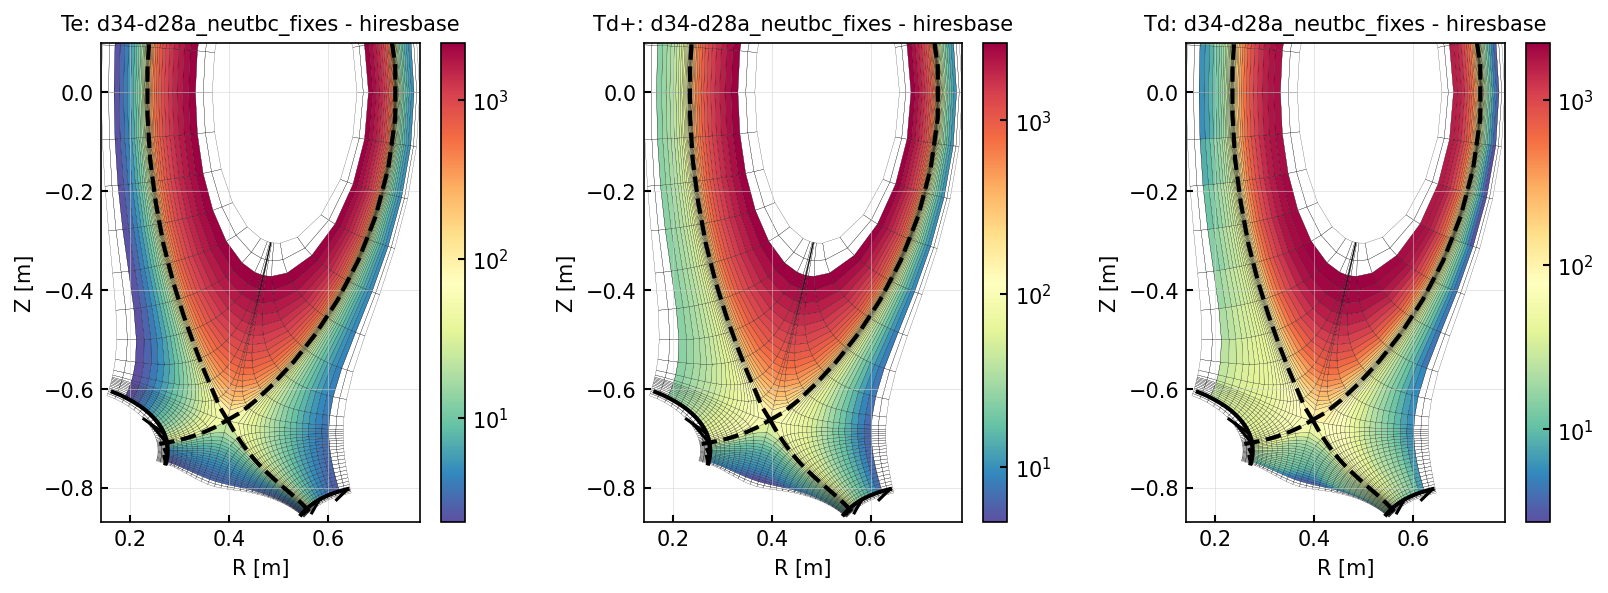

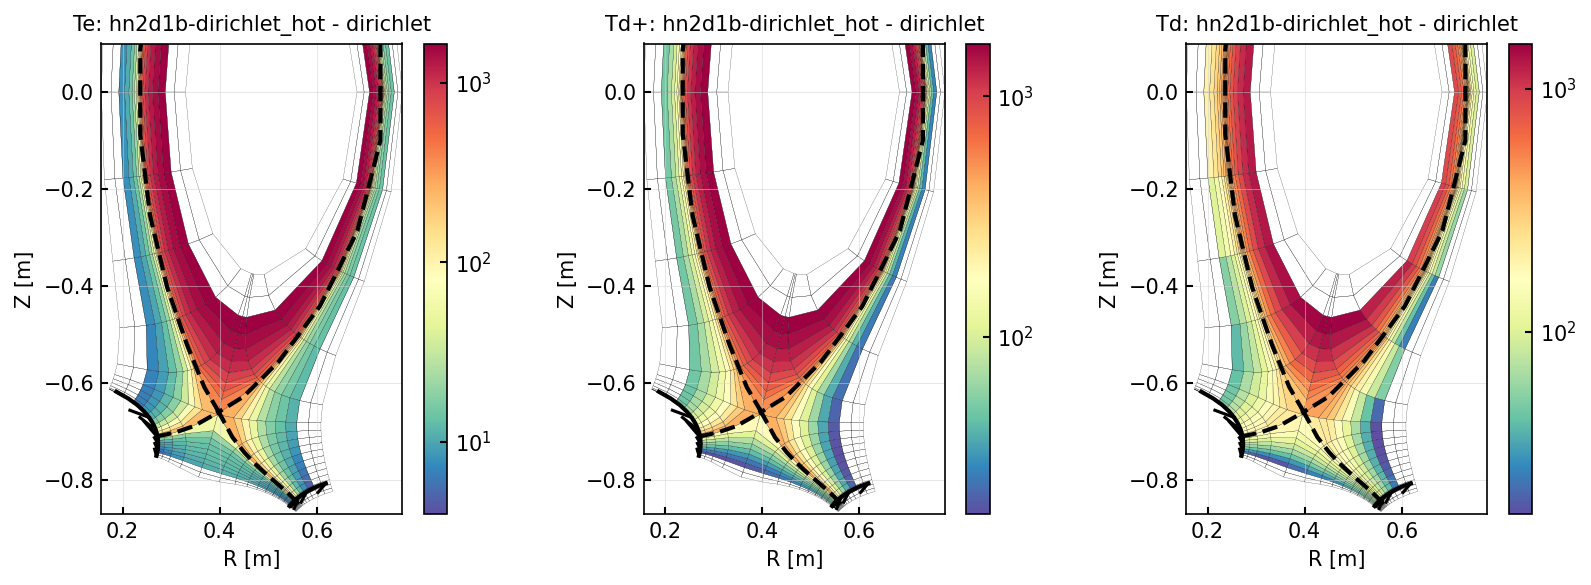

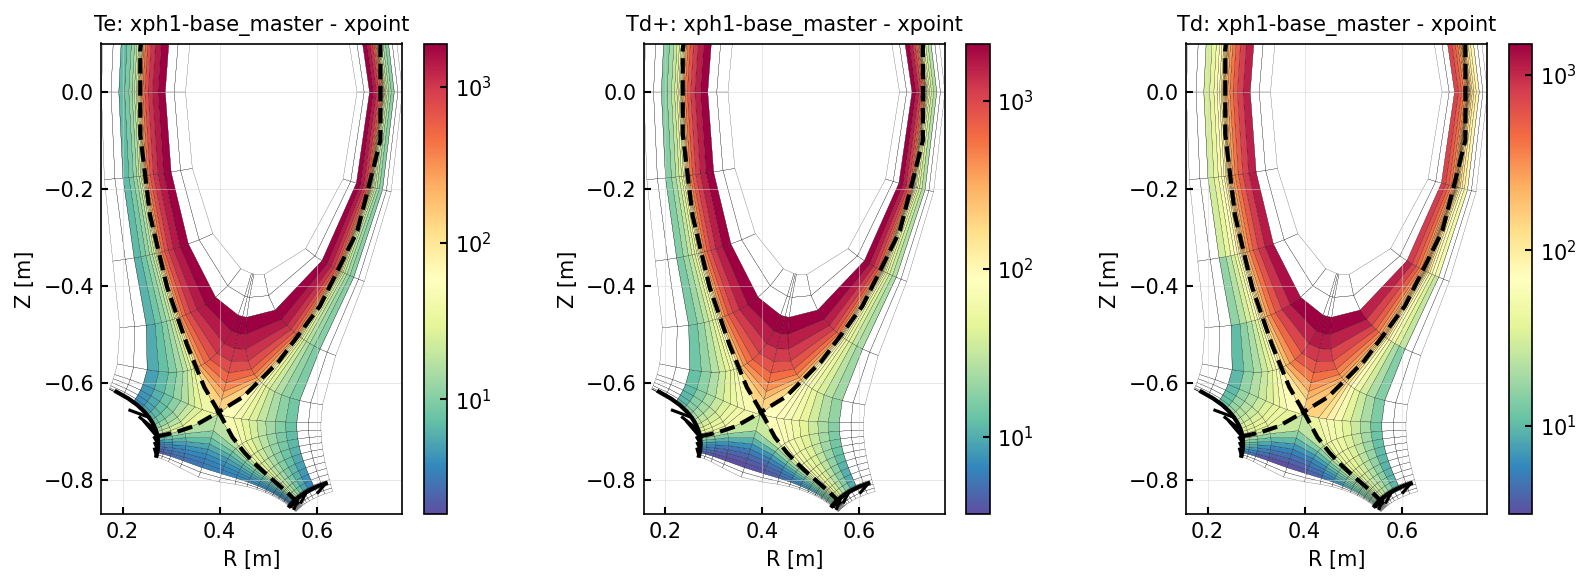

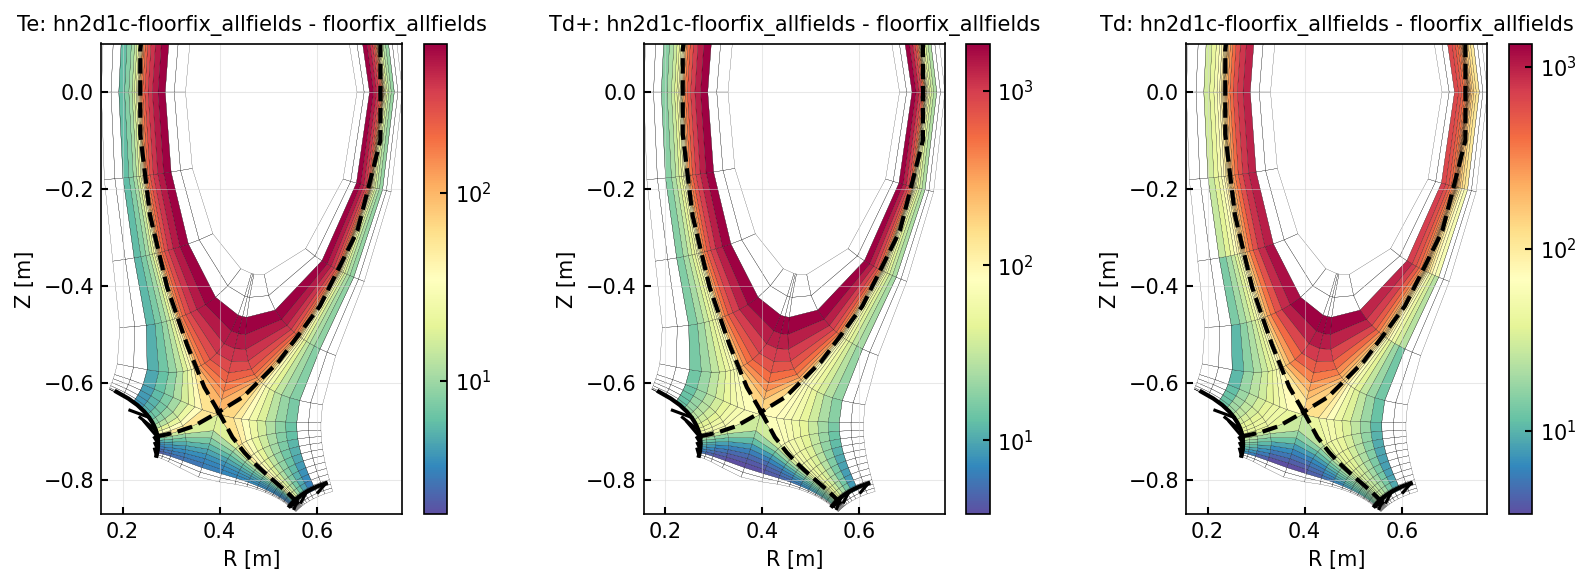

In [5]:
clean_guards = True

xlims = (None, None)
ylims = (-0.87,0.1)

params = ["Te", "Td+", "Td"]
sepkwargs = dict(linewidth = 1, color = "white", linestyle = "-")

for entry in toload:
    case = entry["name"]
    fig, axes = plt.subplots(1,3, figsize = (11,4), dpi = 150)
    newds = cs[case].ds.isel(t=-1)
    
    ax = axes[0]
    param = params[0]
    data = (newds[param])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = True, separatrix_kwargs = sepkwargs)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.set_title(f"{param}: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    
    ax = axes[1]
    param = params[1]
    data = (newds[param])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = True, separatrix_kwargs = sepkwargs)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.set_title(f"{param}: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    
    ax = axes[2]
    param = params[2]
    data = (newds[param])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = True, separatrix_kwargs = sepkwargs)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.set_title(f"{param}: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    fig.tight_layout()


# Floor check

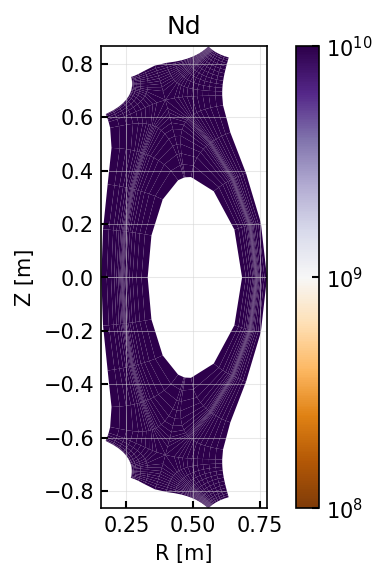

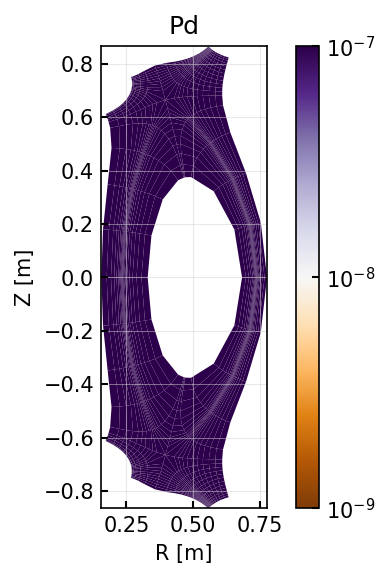

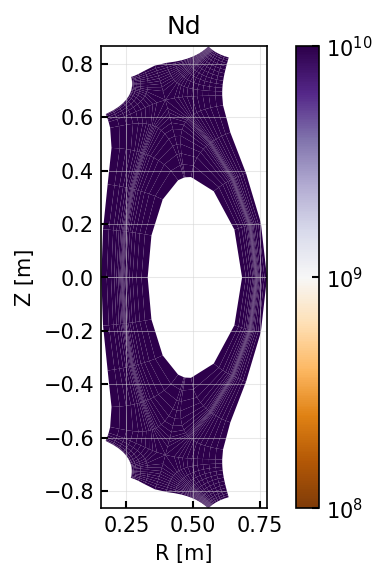

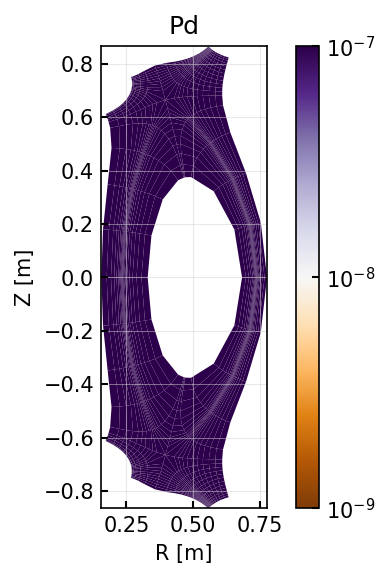

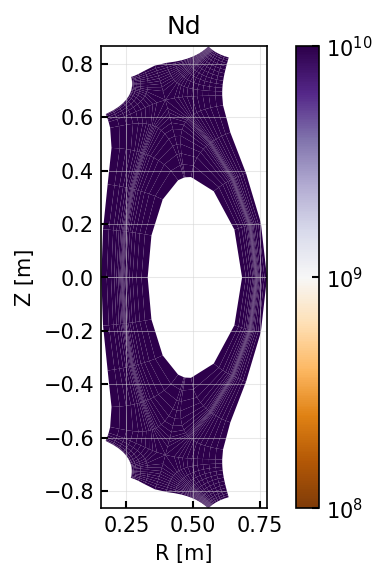

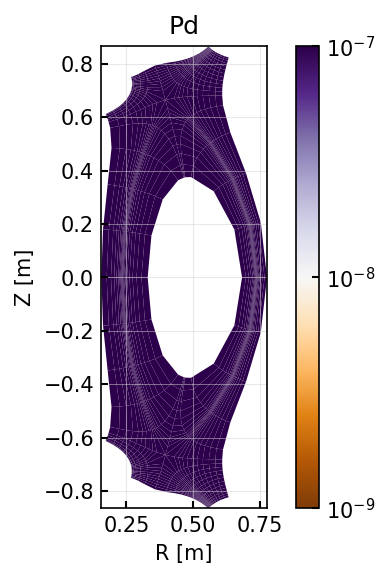

In [5]:
# ds = cs["newalldisabled_lopnfloor"].ds.isel(t=-1)
for case in cs:
    ds = cs[case].ds.isel(t=-1)
    # cmap = mpl.colors.LinearSegmentedColormap.from_list("custom", ["darkorange", "white", "navy"], N=3)
    cmap = "PuOr"

    floors = ds.hermesm.get_floors()
    nn_floor_si = floors["nn_floor_si"]
    pn_floor_si = floors["pn_floor_si"]

    fig, ax = plt.subplots(dpi = 150)
    (ds["Nd"]).bout.polygon(ax = ax, cmap = cmap, targets = False, 
                                                        separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 0),
                                                        antialias = True,
                                                        logscale = True,
                                                        vmin = nn_floor_si*1e-1,
                                                        vmax = nn_floor_si*1e1)
    # ax.set_ylim(-0.9, 0)

    fig, ax = plt.subplots(dpi = 150)
    data = ds["Pd"]/ds["Pd"].attrs["conversion"]
    data.bout.polygon(ax = ax, cmap = cmap, targets = False, 
                                                        separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 0),
                                                        antialias = True,
                                                        logscale = True,
                                                        vmin = floors["pn_floor"]*1e-1,
                                                        vmax = floors["pn_floor"]*1e1)
    # ax.set_ylim(-0.9, 0)